# 1.Importing Modules

In [ ]:
# Basic Modules
import math
import numpy as np
import pandas as pd
import gspread

# Plotting Modules
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px

# Evaluation Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# To save the models in pkl file
import pickle

# Data Scrapping Modules
from google.colab import auth
from oauth2client.client import GoogleCredentials

import xgboost as xgb
from google.colab import files

In [ ]:
!pip install deap

#2.Sklearn Modules

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge,ElasticNet,SGDRegressor
from sklearn import metrics as met
from itertools import combinations
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, cross_validate, GridSearchCV, KFold
from sklearn.feature_selection import RFE, SelectKBest

from sklearn.metrics import mean_squared_error, r2_score

import random
from sklearn.model_selection import GridSearchCV
from deap import base, creator, tools, algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import PolynomialFeatures

#3.Loading the Data

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

# Define the file path (update with your actual file path)
file_path ="/content/drive/My Drive/resume/real_estate_dataset.csv"
# Read the Excel file
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
0   1   143.635030             1              3           3        1967   
1   2   287.678577             1              2           1        1949   
2   3   232.998485             1              3           2        1923   
3   4   199.664621             5              2           2        1918   
4   5    89.004660             4              3           3        1999   

   Has_Garden  Has_Pool  Garage_Size  Location_Score  Distance_to_Center  \
0           1         1           48        8.297631            5.935734   
1           0         1           37        6.061466           10.827392   
2           1         0           14        2.911442            6.904599   
3           0         0           17        2.070949            8.284019   
4           1         0           34    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB


In [ ]:
df.describe()

ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  \
count  500.000000   500.000000    500.000000     500.000000  500.000000   
mean   250.500000   174.640428      2.958000       1.976000    1.964000   
std    144.481833    74.672102      1.440968       0.820225    0.802491   
min      1.000000    51.265396      1.000000       1.000000    1.000000   
25%    125.750000   110.319923      2.000000       1.000000    1.000000   
50%    250.500000   178.290937      3.000000       2.000000    2.000000   
75%    375.250000   239.031220      4.000000       3.000000    3.000000   
max    500.000000   298.241199      5.000000       3.000000    3.000000   

        Year_Built  Has_Garden    Has_Pool  Garage_Size  Location_Score  \
count   500.000000  500.000000  500.000000   500.000000      500.000000   
mean   1957.604000    0.536000    0.492000    30.174000        5.164410   
std      35.491781    0.499202    0.500437    11.582575        2.853489   
min    1900.000000    0.000000    0.000000    10.000000        0.004428   
25%    1926.000000    0.000000    0.000000    20.000000        2.760650   
50%    1959.000000    1.000000    0.000000    30.000000        5.206518   
75%    1988.000000    1.000000    1.000000    41.000000        7.732933   
max    2022.000000    1.000000    1.000000    49.000000        9.995439   

       Distance_to_Center          Price  
count          500.000000     500.000000  
mean            10.469641  582209.629529  
std              5.588197  122273.390345  
min              0.062818  276892.470136  
25%              6.066754  503080.344140  
50%             10.886066  574724.113347  
75%             15.072590  665942.301274  
max             19.927966  960678.274291

In [ ]:
df.isnull().sum()

ID                    0
Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Year_Built            0
Has_Garden            0
Has_Pool              0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 0
dtype: int64

In [ ]:
print(df.columns.values)

['ID' 'Square_Feet' 'Num_Bedrooms' 'Num_Bathrooms' 'Num_Floors'
 'Year_Built' 'Has_Garden' 'Has_Pool' 'Garage_Size' 'Location_Score'
 'Distance_to_Center' 'Price']


In [ ]:
print(df.dtypes)

ID                      int64
Square_Feet           float64
Num_Bedrooms            int64
Num_Bathrooms           int64
Num_Floors              int64
Year_Built              int64
Has_Garden              int64
Has_Pool                int64
Garage_Size             int64
Location_Score        float64
Distance_to_Center    float64
Price                 float64
dtype: object


# 4.Separating Compositions And Target values

In [ ]:
# Selecting relevant features and target
composites = ['Square_Feet','Num_Bedrooms','Num_Bathrooms','Num_Floors','Year_Built','Has_Garden','Has_Pool','Garage_Size','Location_Score','Distance_to_Center']
target = ['Price']

# Create a new DataFrame with the selected features and target
selected_data = df[composites + target]

In [ ]:
# Check the first few rows
print(selected_data.head())

   Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
0   143.635030             1              3           3        1967   
1   287.678577             1              2           1        1949   
2   232.998485             1              3           2        1923   
3   199.664621             5              2           2        1918   
4    89.004660             4              3           3        1999   

   Has_Garden  Has_Pool  Garage_Size  Location_Score  Distance_to_Center  \
0           1         1           48        8.297631            5.935734   
1           0         1           37        6.061466           10.827392   
2           1         0           14        2.911442            6.904599   
3           0         0           17        2.070949            8.284019   
4           1         0           34        1.523278           14.648277   

           Price  
0  602134.816747  
1  591425.135386  
2  464478.696880  
3  583105.655996  
4  619879.142523  


In [ ]:
# Features (composites)
X = df[composites]

# Targets
Y = df[target]

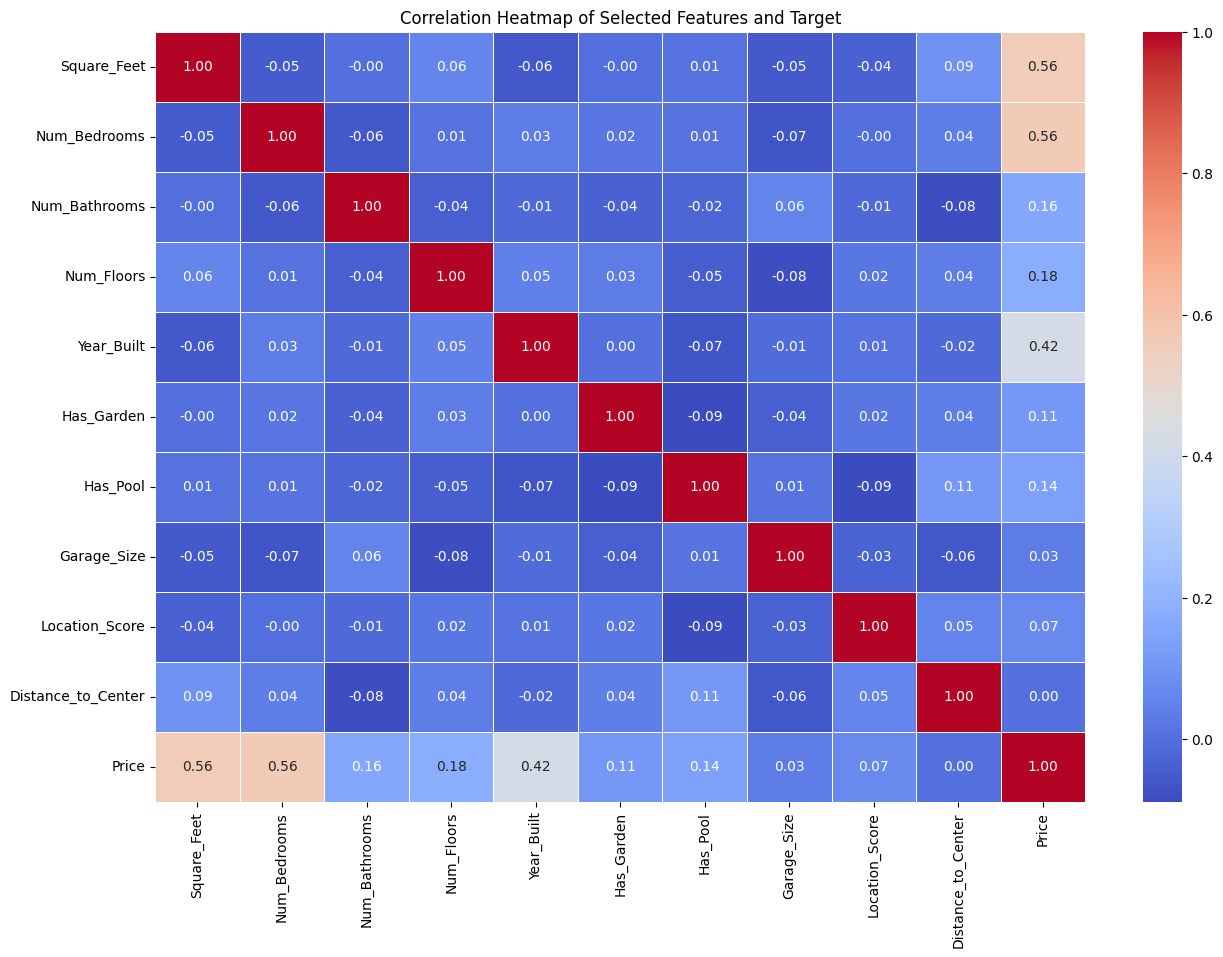

In [ ]:
# Compute the correlation matrix for the selected data
correlation_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features and Target')
plt.show()

#5.EDA

## **5.1 Spliting Data**

In [ ]:
'''# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)'''

'# Split the data into training and testing sets (80% train, 20% test)\nX_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)'

In [ ]:

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)  # 40% for validation + test

X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)  # 50% of 40% each

# Print the sizes
print(f"Training Set: {X_train.shape[0]} rows")
print(f"Test Set: {X_test.shape[0]} rows")
print(f"Validation Set: {X_val.shape[0]} rows")

Training Set: 350 rows
Test Set: 75 rows
Validation Set: 75 rows


In [ ]:
X

Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
0     143.635030             1              3           3        1967   
1     287.678577             1              2           1        1949   
2     232.998485             1              3           2        1923   
3     199.664621             5              2           2        1918   
4      89.004660             4              3           3        1999   
..           ...           ...            ...         ...         ...   
495   138.338057             2              2           2        1967   
496   195.914028             2              3           1        1977   
497    69.433659             1              1           2        2004   
498   293.598702             5              1           3        1940   
499   296.552686             4              3           1        1988   

     Has_Garden  Has_Pool  Garage_Size  Location_Score  Distance_to_Center  
0             1         1           48        8.297631            5.935734  
1             0         1           37        6.061466           10.827392  
2             1         0           14        2.911442            6.904599  
3             0         0           17        2.070949            8.284019  
4             1         0           34        1.523278           14.648277  
..          ...       ...          ...             ...                 ...  
495           1         0           16        4.296086            5.562583  
496           0         1           45        7.406261            2.845105  
497           0         0           18        8.629724            6.263264  
498           1         0           41        5.318891           16.990684  
499           1         1           20        7.894322            1.779794  

[500 rows x 10 columns]

In [ ]:
Y

Price
0    602134.816747
1    591425.135386
2    464478.696880
3    583105.655996
4    619879.142523
..             ...
495  488496.350722
496  657736.921717
497  405324.950201
498  773035.968028
499  864299.500218

[500 rows x 1 columns]

In [ ]:
X_train

Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
5      88.998630             5              3           2        1959   
116   250.918019             4              1           3        1957   
45    215.630571             5              3           3        1984   
16    126.060561             2              2           1        1968   
462   236.511220             4              3           3        1914   
..           ...           ...            ...         ...         ...   
106   152.595731             2              3           1        2001   
270   252.340289             4              1           1        1912   
348   143.653154             4              3           2        2017   
435   225.242283             1              2           3        1943   
102   128.588995             1              2           3        1901   

     Has_Garden  Has_Pool  Garage_Size  Location_Score  Distance_to_Center  
5             1         1           36        8.994552           17.633250  
116           1         0           12        4.946752            5.164620  
45            0         1           47        3.019167           13.464929  
16            0         1           45        6.509573           14.987809  
462           1         0           47        9.245611            4.215629  
..          ...       ...          ...             ...                 ...  
106           0         1           17        8.082754           13.549468  
270           0         1           43        9.615133           18.313445  
348           1         0           38        5.636600           13.284034  
435           1         0           27        1.443876            0.909050  
102           0         0           36        0.460567            8.521420  

[350 rows x 10 columns]

In [ ]:
Y_train

Price
5    670386.804433
116  670086.008923
45   848335.005024
16   527769.813028
462  702645.571919
..             ...
106  605185.145665
270  635900.840222
348  749942.507942
435  503593.320584
102  299477.849956

[350 rows x 1 columns]

##*5.2 Min and Max values*

In [ ]:

# Finding the min and max values for each column
min_values = df.min()
max_values = df.max()

# Displaying the results
print("Minimum values:\n", min_values)
print("\nMaximum values:\n", max_values)

Minimum values:
 ID                         1.000000
Square_Feet               51.265396
Num_Bedrooms               1.000000
Num_Bathrooms              1.000000
Num_Floors                 1.000000
Year_Built              1900.000000
Has_Garden                 0.000000
Has_Pool                   0.000000
Garage_Size               10.000000
Location_Score             0.004428
Distance_to_Center         0.062818
Price                 276892.470136
dtype: float64

Maximum values:
 ID                       500.000000
Square_Feet              298.241199
Num_Bedrooms               5.000000
Num_Bathrooms              3.000000
Num_Floors                 3.000000
Year_Built              2022.000000
Has_Garden                 1.000000
Has_Pool                   1.000000
Garage_Size               49.000000
Location_Score             9.995439
Distance_to_Center        19.927966
Price                 960678.274291
dtype: float64


## **5.3 Graph**

### **a. Scatter Plot**

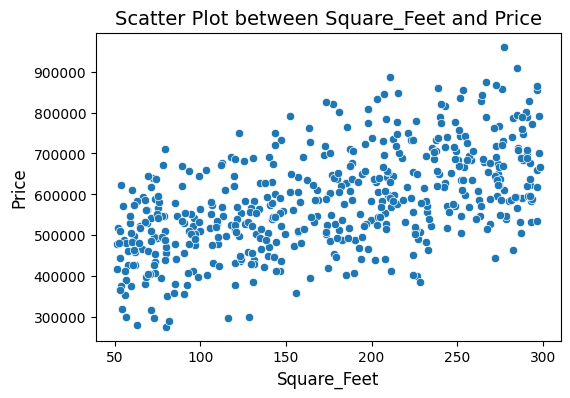

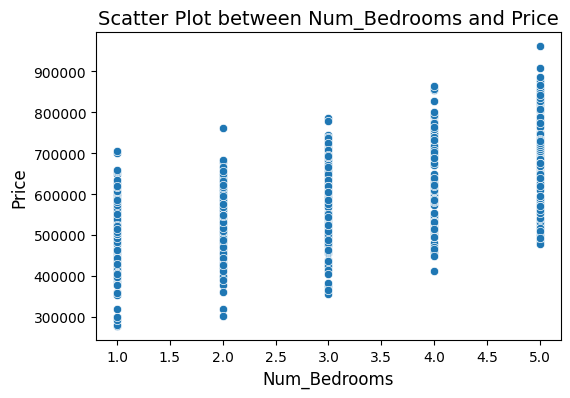

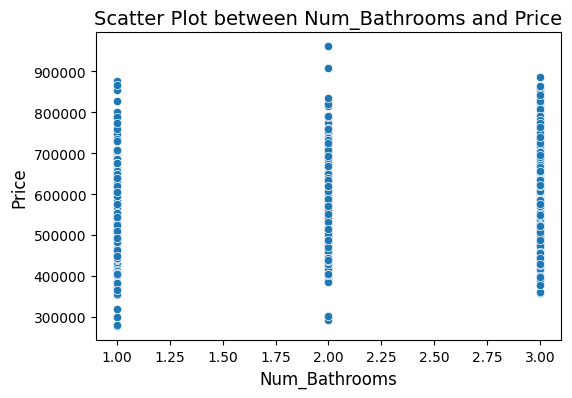

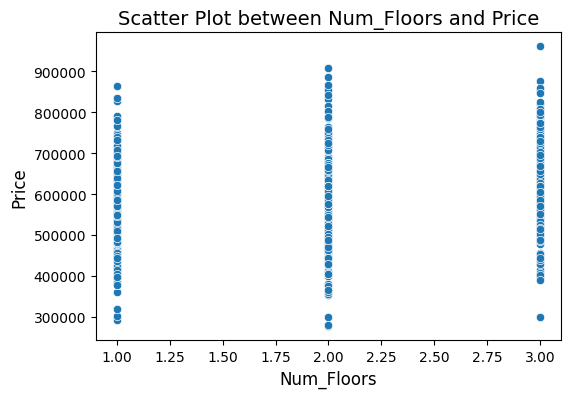

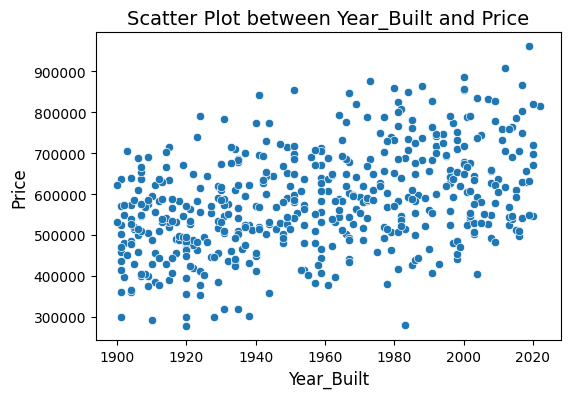

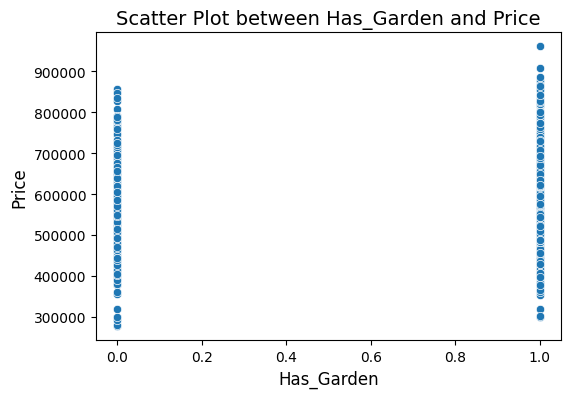

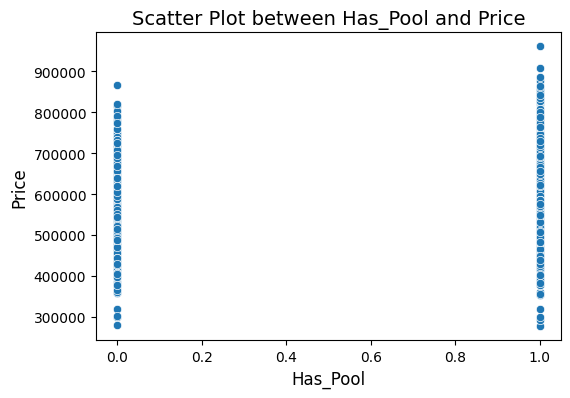

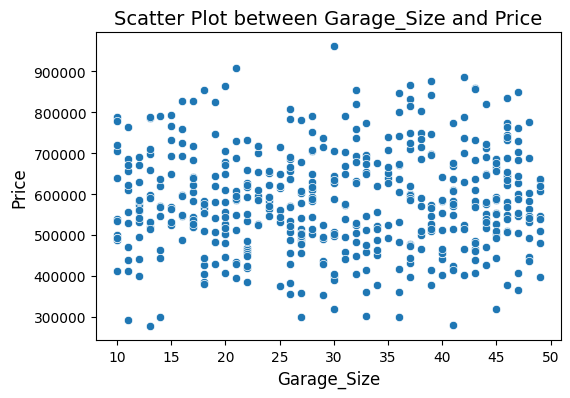

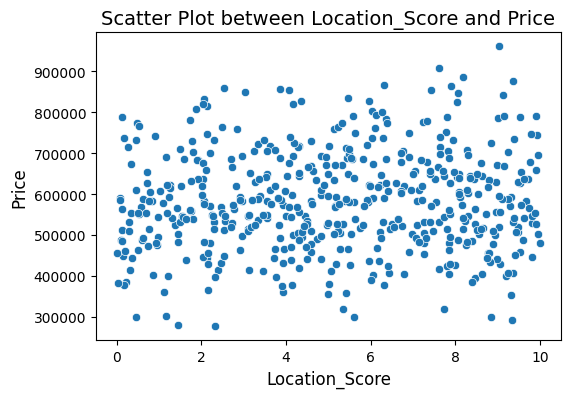

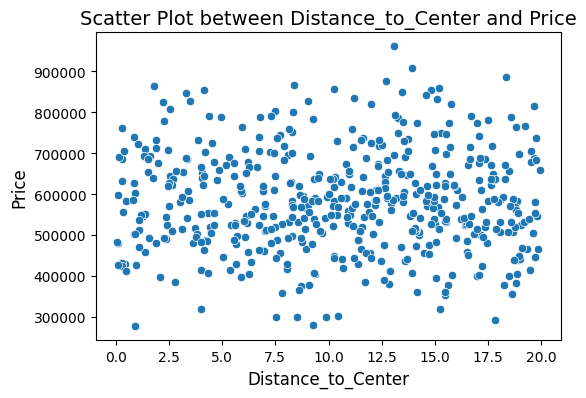

In [ ]:

# List of elements to plot against ΔT and AP
elements =['Square_Feet','Num_Bedrooms','Num_Bathrooms','Num_Floors','Year_Built','Has_Garden','Has_Pool','Garage_Size','Location_Score','Distance_to_Center']
# Create scatter plots and save them
for element in elements:
    for target in ['Price']:
        plt.figure(figsize=(6, 4))  # Adjust figure size
        sns.scatterplot(x=element, y=target, data=df)
        plt.title(f'Scatter Plot between {element} and {target}', fontsize=14)
        plt.xlabel(element, fontsize=12)
        plt.ylabel(target, fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)

        # Save in multiple formats for research use
        filename = f"scatter_{element}_{target}"
        plt.savefig(f"{filename}.png", dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()


### **b. PairPlot**

<Figure size 2000x2000 with 0 Axes>

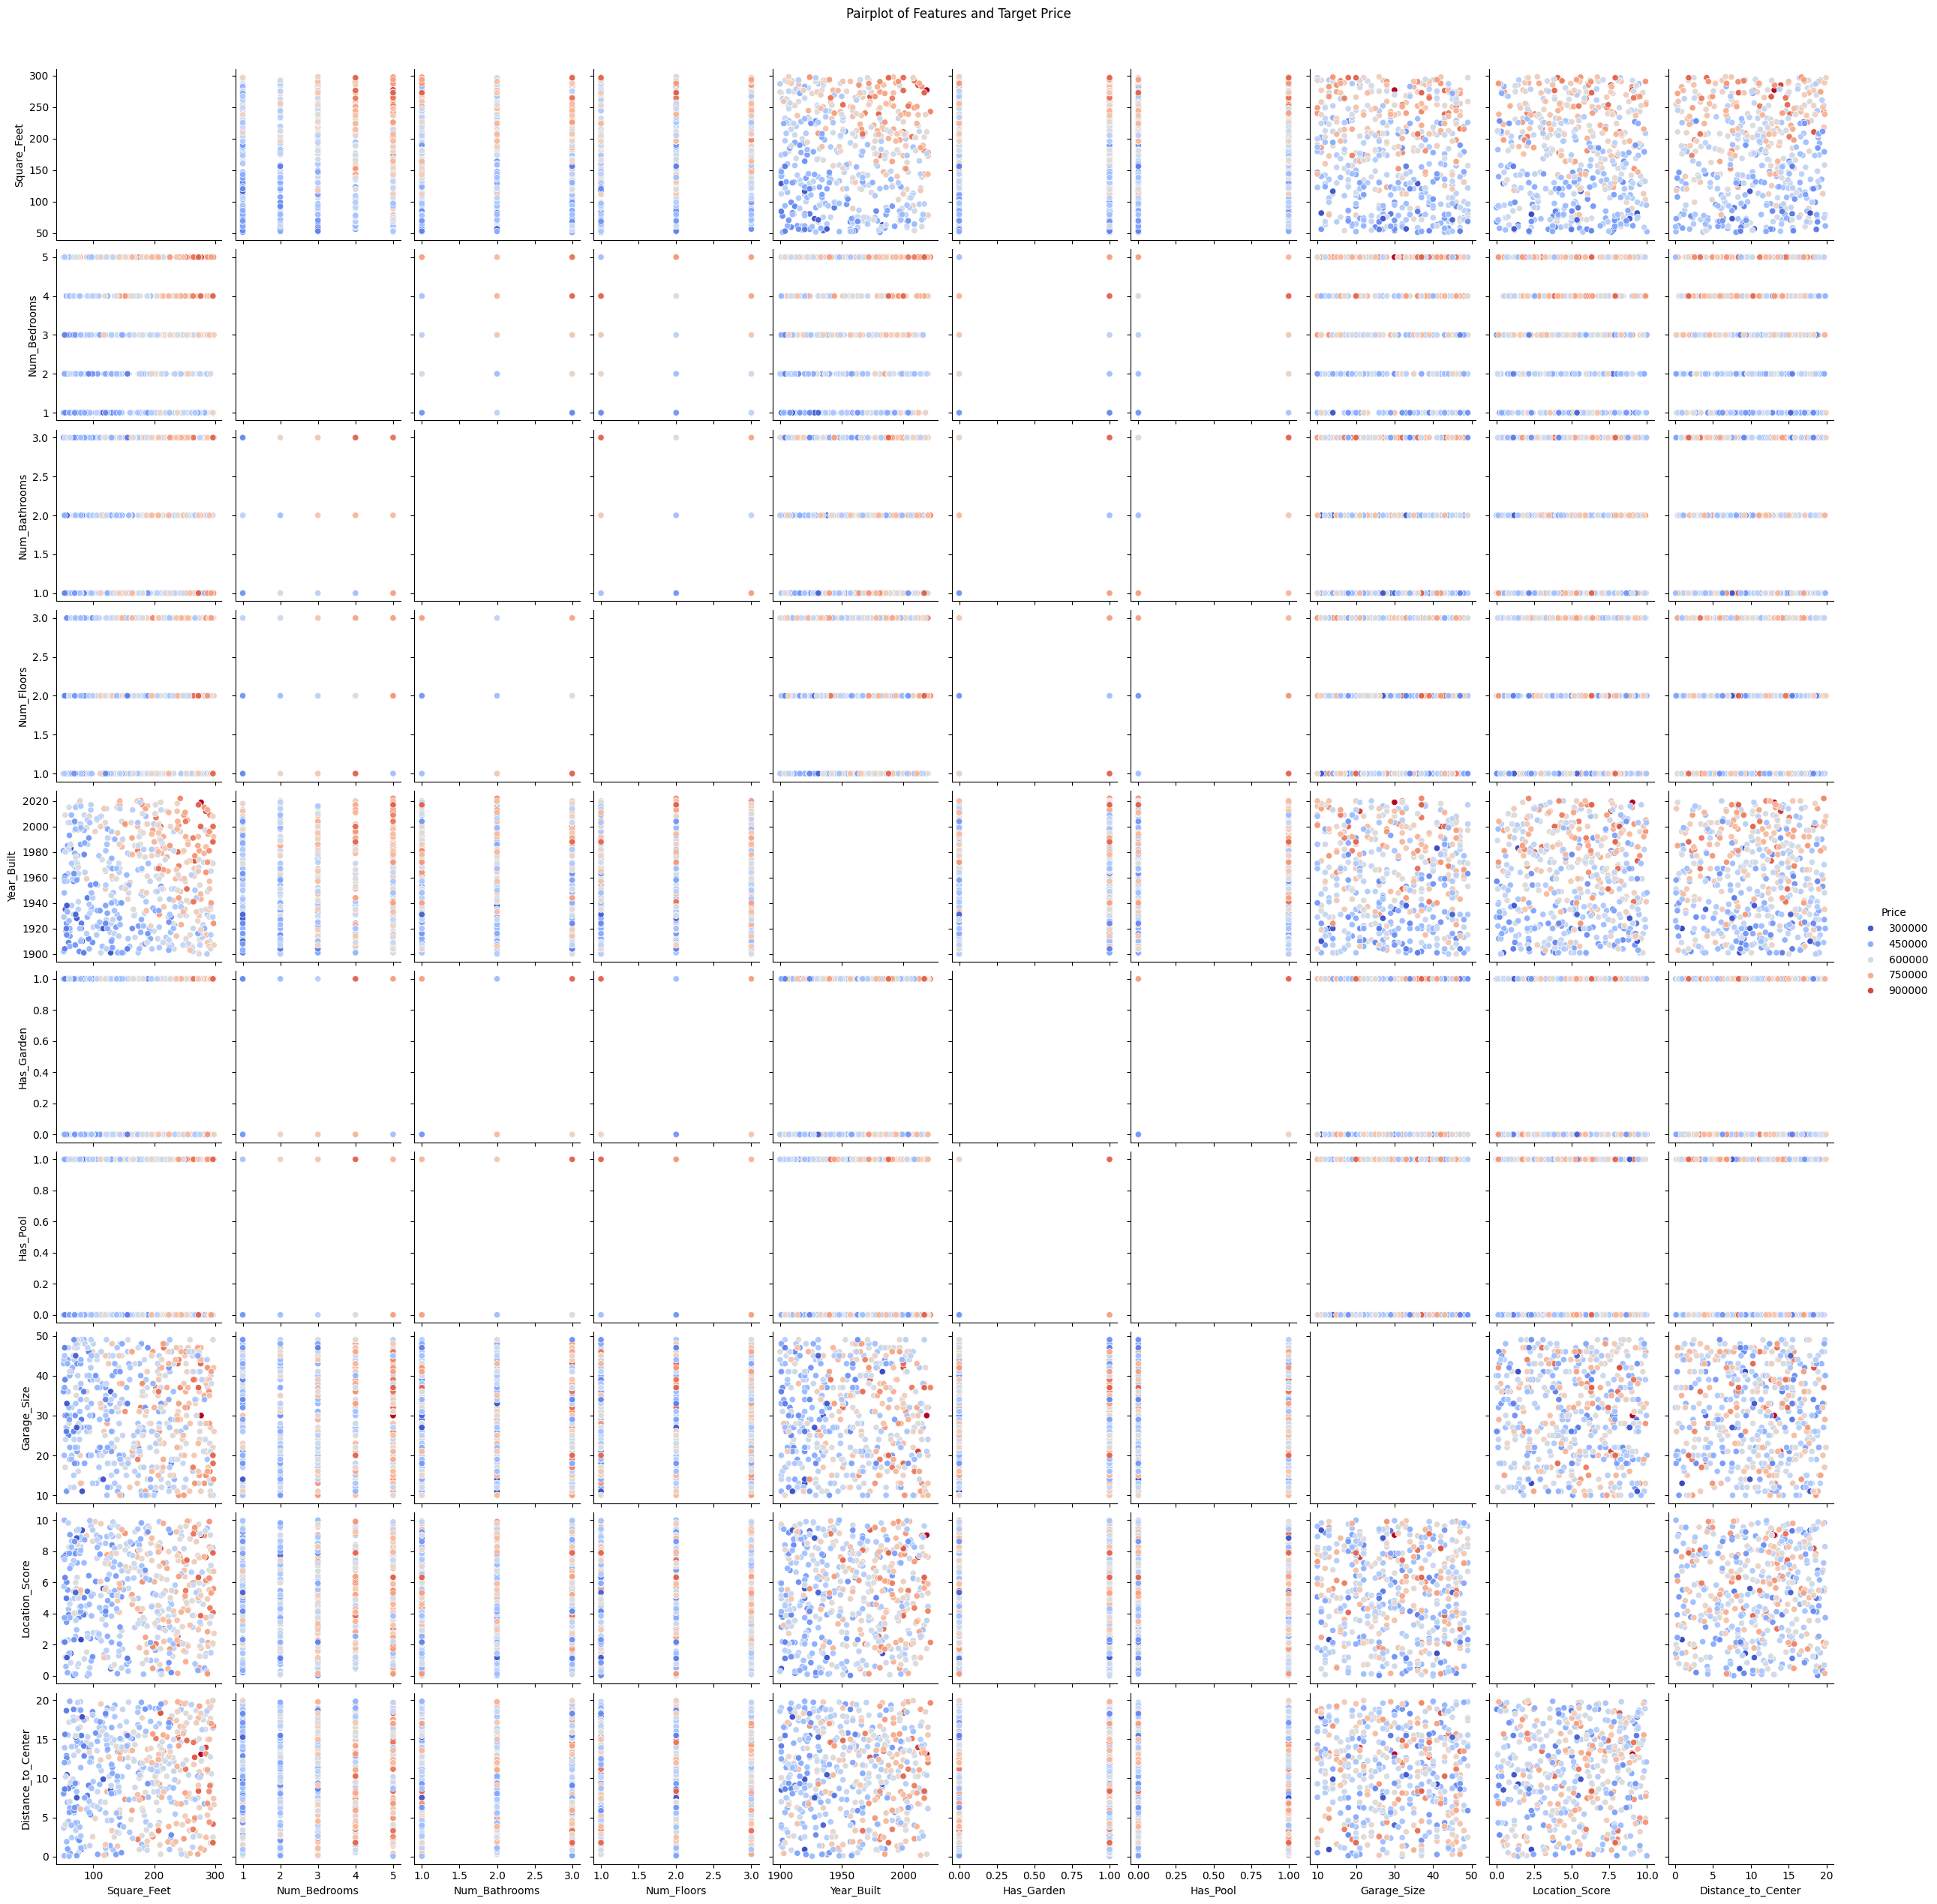

In [ ]:

# Define the figure size
plt.figure(figsize=(20, 20))

# Convert target to a list
target_list = [target]  # Now target_list is ['Price']

df_combined = df[composites + target_list]  # Combine the selected features and target columns
sns.pairplot(df_combined, hue='Price', palette='coolwarm')
plt.suptitle('Pairplot of Features and Target Price', y=1.02)
plt.show()


### **c. Histogram**

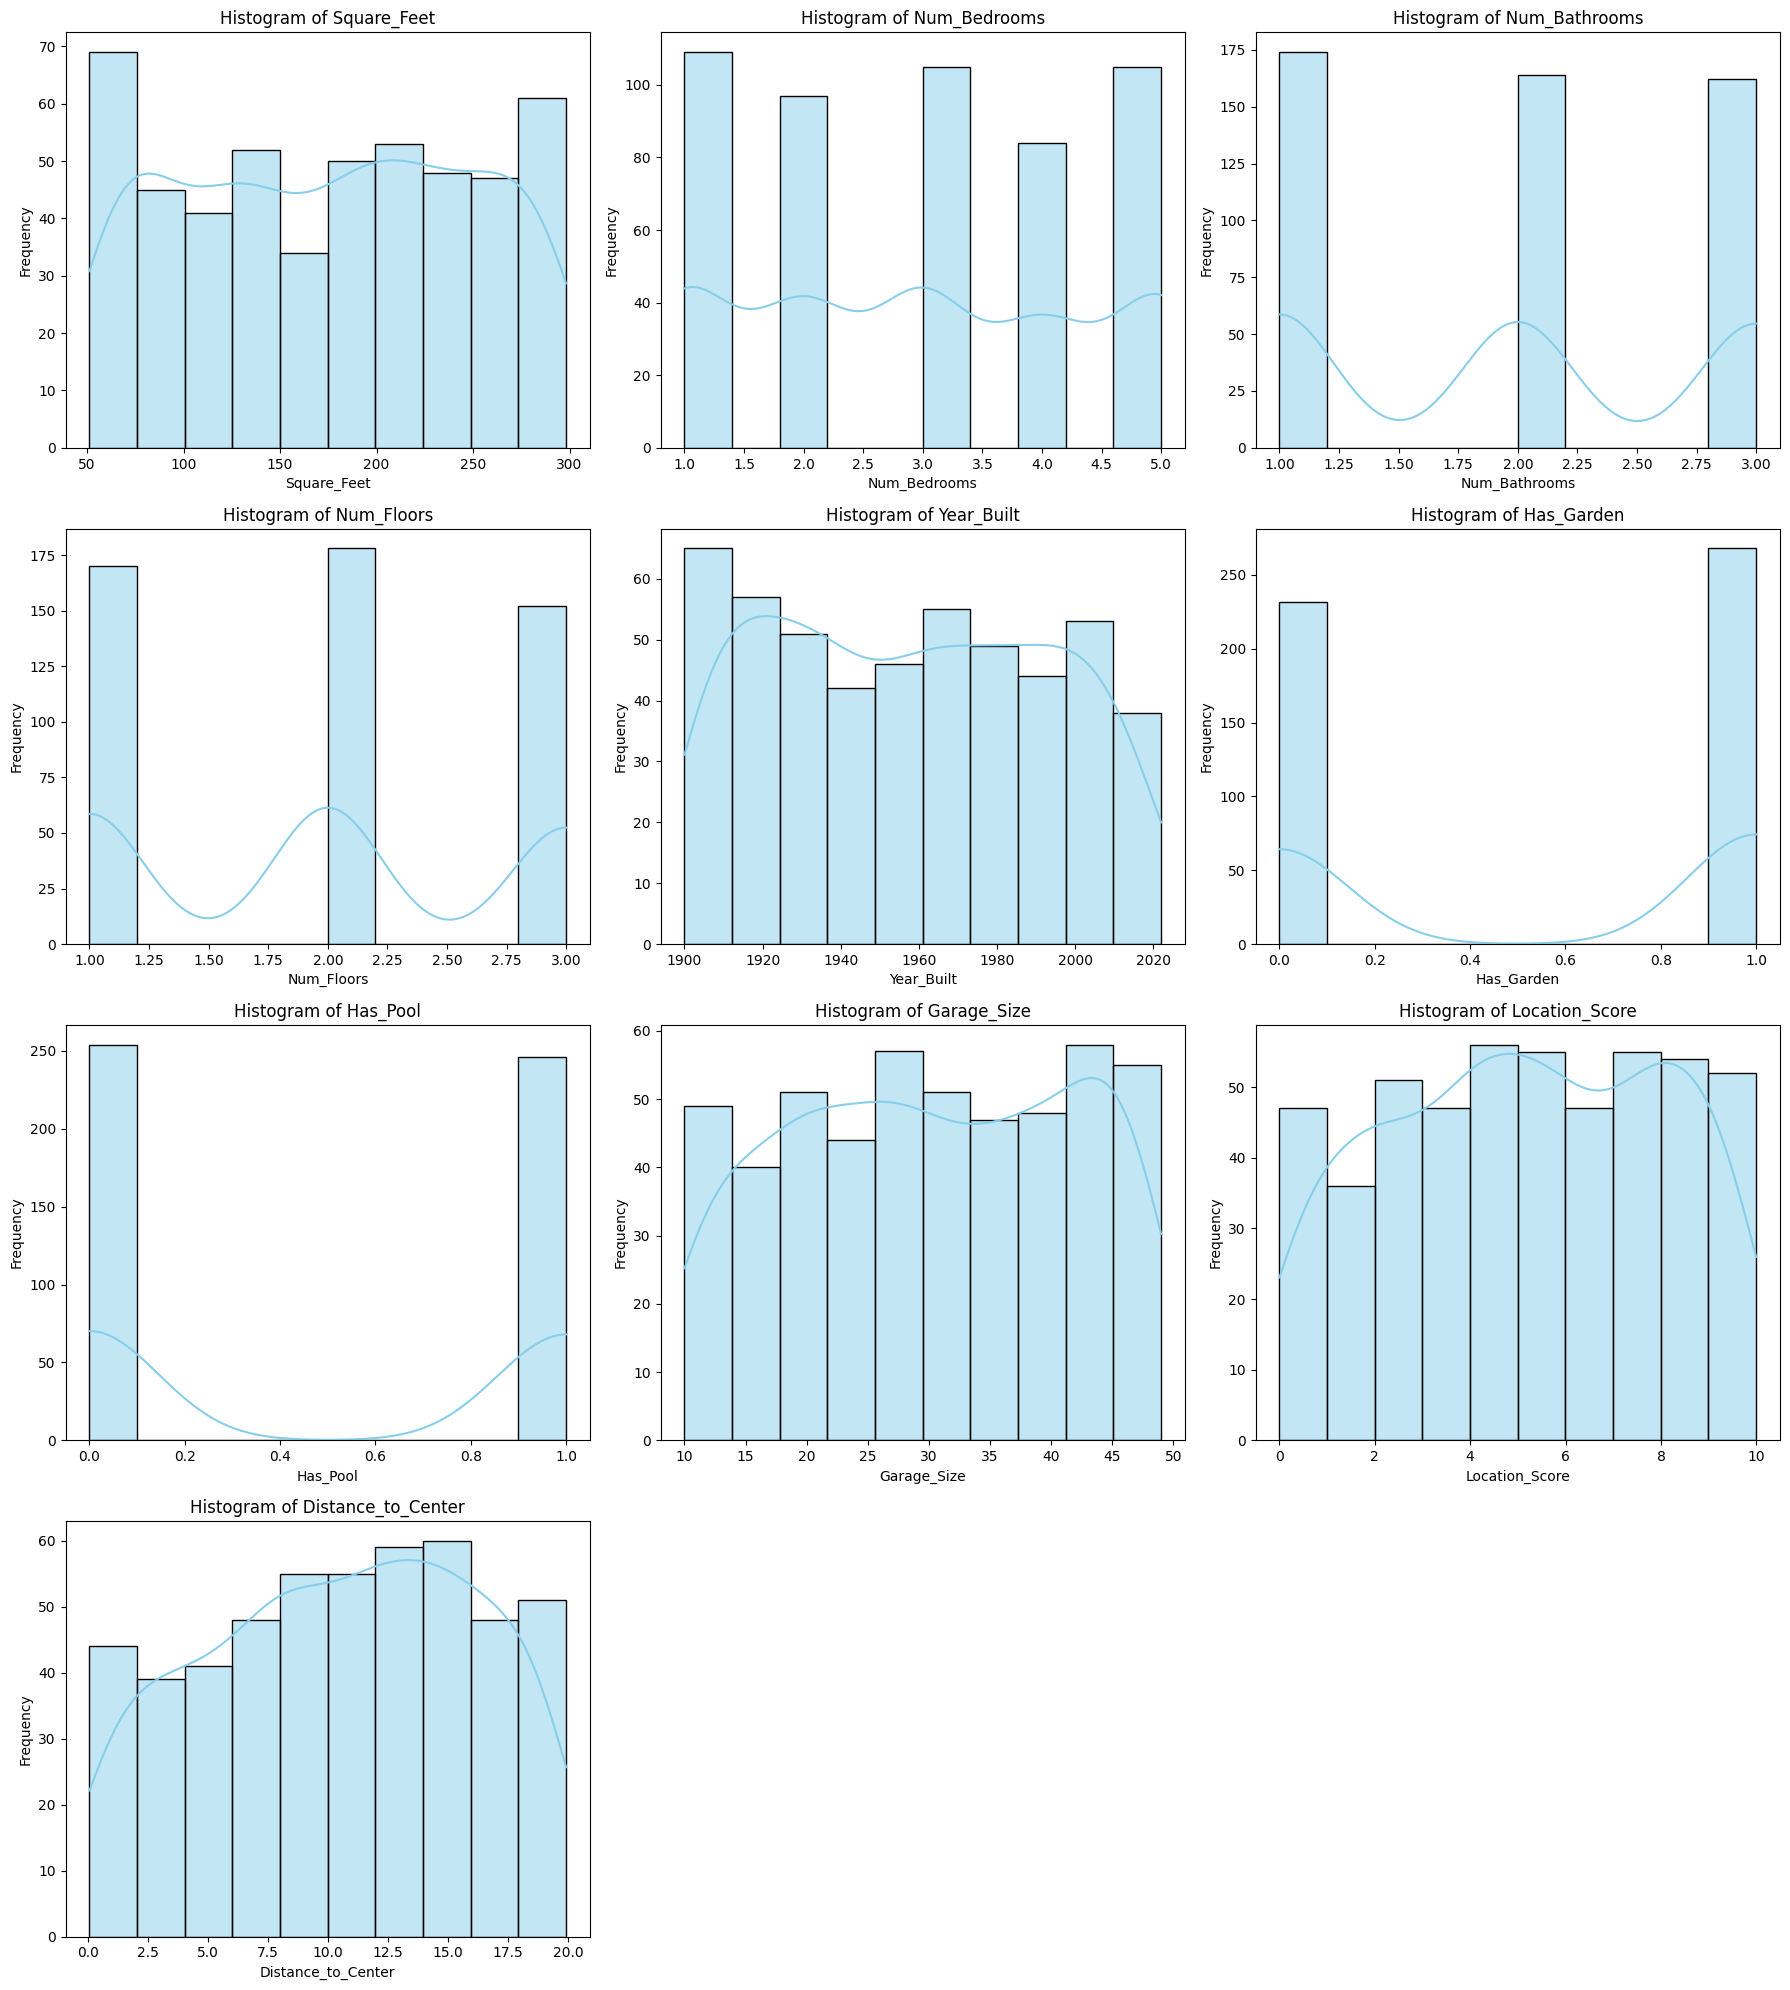

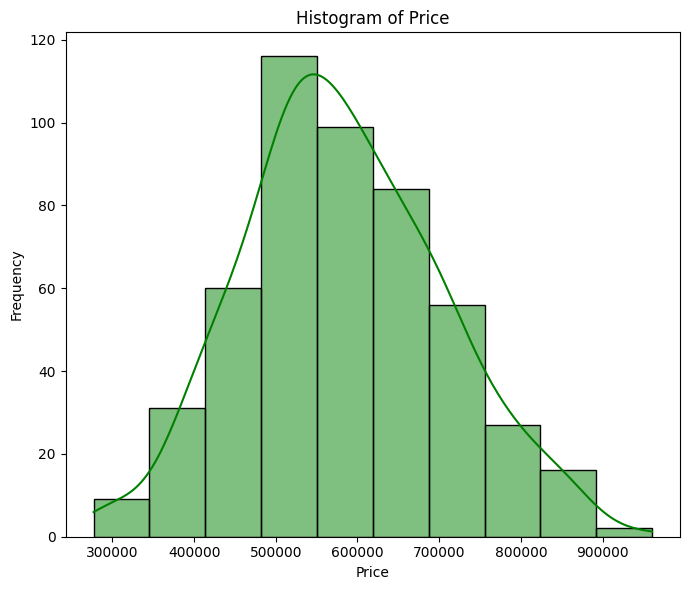

In [ ]:
# Number of features
num_features = len(composites)

# Determine the number of rows and columns needed
ncols = 3  # Keeping 3 columns for better visualization
nrows = math.ceil(num_features / ncols)  # Calculate required rows

# Set up the figure and axes dynamically
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))

# Flatten axes for easy iteration (handles cases where nrows=1)
axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(composites):
    sns.histplot(df[feature], kde=True, ax=axes[i], color='skyblue', bins=10)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots (if composites is not a multiple of 3)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove unused subplot axes

# Adjust layout
plt.tight_layout()

# The original code was trying to plot histograms for 'ΔT' and 'AP' which are
# not in the DataFrame. Instead, we will plot a histogram for 'Price',
# which is the target variable.

# Create a histogram for the target variable 'Price'
fig2, ax2 = plt.subplots(figsize=(7, 6))  # Adjust figsize as needed

sns.histplot(df['Price'], kde=True, ax=ax2, color='green', bins=10)
ax2.set_title('Histogram of Price')
ax2.set_xlabel('Price')
ax2.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# 6.Model Creation + Training

###*Parity Plot function for Test and Train*

In [ ]:
def parity_plot(y_train, y_pred_train, y_test, y_pred_test, model_name="Model"):
    """
    Function to create parity plots for train and test datasets.
    """
    plt.figure(figsize=(12, 12))
    box_props = dict(facecolor='white', alpha=0.8, edgecolor='black')

    # Assuming you want parity plots for two targets (ΔT and AP)
    labels = ['Price']  # Define the labels here - updated to 'Price'

    for i, label in enumerate(labels):
        # Training Data Parity Plot
        plt.subplot(2, 2, 2 * i + 1)
        # Accessing columns of y_train and y_pred_train using iloc for integer-based row indexing
        #--- Modified this line to directly access the Price values for y_train
        #--- Also, reshape y_pred_train to be a 1-dimensional array
        plt.scatter(y_train['Price'].values, y_pred_train, color='blue', alpha=0.6, label='Train')  # Removed [:, i]
        plt.plot([y_train['Price'].values.min(), y_train['Price'].values.max()],
                 [y_train['Price'].values.min(), y_train['Price'].values.max()], 'k--', lw=2)
        plt.title(f'Parity Plot for {label} (Train - {model_name})')
        plt.xlabel(f'Actual {label}')
        plt.ylabel(f'Predicted {label}')
        (True)
        rmse_train = np.sqrt(mean_squared_error(y_train['Price'].values, y_pred_train))  # Removed [:, i]
        r2_train = r2_score(y_train['Price'].values, y_pred_train)  # Removed [:, i]
        plt.text(0.05, 0.90, f'RMSE: {rmse_train:.2f}\nR²: {r2_train:.2f}',
                 transform=plt.gca().transAxes, fontsize=12, bbox=box_props)

        # Testing Data Parity Plot
        plt.subplot(2, 2, 2 * i + 2)
        #--- Also, reshape y_pred_test to be a 1-dimensional array
        plt.scatter(y_test['Price'].values, y_pred_test, color='red', alpha=0.6, label='Test')  # Removed [:, i]
        plt.plot([y_test['Price'].values.min(), y_test['Price'].values.max()],
                 [y_test['Price'].values.min(), y_test['Price'].values.max()], 'k--', lw=2)
        plt.title(f'Parity Plot for {label} (Test - {model_name})')
        plt.xlabel(f'Actual {label}')
        plt.ylabel(f'Predicted {label}')
        (True)
        rmse_test = np.sqrt(mean_squared_error(y_test['Price'].values, y_pred_test))  # Removed [:, i]
        r2_test = r2_score(y_test['Price'].values, y_pred_test)  # Removed [:, i]
        plt.text(0.05, 0.90, f'RMSE: {rmse_test:.2f}\nR²: {r2_test:.2f}',
                 transform=plt.gca().transAxes, fontsize=12, bbox=box_props)

    plt.tight_layout()
    plt.show()

###*Parity Plot function for Validation*

In [ ]:

def plot_parity(Y_actual, Y_predicted, model_name="Model"):
    """
    Creates parity plots for Price with R² and RMSE values.

    Parameters:
    Y_actual (pd.DataFrame): Actual target values with column ['Price']
    Y_predicted (np.array): Predicted target values (same order as Y_actual)
    model_name (str): Name of the model to be displayed in the title
    """
    # Reshape Y_predicted to 1-D if necessary
    Y_predicted = Y_predicted.reshape(-1) #Reshape Y_predicted to be a 1-D array
    # Compute R² and RMSE
    rmse_Price = np.sqrt(mean_squared_error(Y_actual['Price'], Y_predicted)) #Calculate for 'Price'
    r2_Price = r2_score(Y_actual['Price'], Y_predicted)  #Calculate for 'Price'

    # Create figure with 1 subplot for 'Price'
    fig, ax = plt.subplots(1, 1, figsize=(8, 6)) # Adjust figsize as needed

    # Parity Plot for 'Price'
    sns.scatterplot(x=Y_actual['Price'], y=Y_predicted, ax=ax, color='blue', alpha=0.7)
    ax.plot([min(Y_actual['Price']), max(Y_actual['Price'])], [min(Y_actual['Price']), max(Y_actual['Price'])],
                 color='red', linestyle='--')
    ax.set_xlabel("Actual Price")
    ax.set_ylabel("Predicted Price")
    ax.set_title(f"Parity Plot for Price ({model_name})")
    ax.text(0.05, 0.95, f"RMSE = {rmse_Price:.2f}\nR² = {r2_Price:.2f}",
                 transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ax.grid(False)  # Remove grid

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

## *6.1 Random Forest*

###*Model*

In [ ]:
# === Define the base model ===
rf_Model = RandomForestRegressor(random_state=42, n_jobs=-1)

# === Define the hyperparameter grid ===
param_grid_rf = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [10, 20, None],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

# === Wrap the model with MultiOutputRegressor ===
multioutput_rf_Model = MultiOutputRegressor(rf_Model)

# === Use GridSearchCV to find the best parameters ===
grid_search_rf = GridSearchCV(
    estimator=multioutput_rf_Model,
    param_grid=param_grid_rf,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# === Perform grid search on training data ===
grid_search_rf.fit(X_train, Y_train)

# === Get the best hyperparameters ===
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters:", best_params_rf)

# === Train the final model with the best parameters ===
best_rf_Model = grid_search_rf.best_estimator_


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'estimator__max_depth': 20, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 300}


In [ ]:
best_params_rf = {'estimator__max_depth': 20, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 300}
print(best_params_rf)

{'estimator__max_depth': 20, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 300}


In [ ]:
# === Make predictions on the Test Set ===
Y_pred_test_rf = best_rf_Model.predict(X_test)

# === Make predictions on the Train Set ===
Y_pred_train_rf = best_rf_Model.predict(X_train)


rf_rmse_test_Price = np.sqrt(mean_squared_error(Y_test['Price'], Y_pred_test_rf))  # Access 'Price' column
rf_r2_test_Price = r2_score(Y_test['Price'], Y_pred_test_rf)  # Access 'Price' column


rf_rmse_train_Price = np.sqrt(mean_squared_error(Y_train['Price'], Y_pred_train_rf))  # Access 'Price' column
rf_r2_train_Price = r2_score(Y_train['Price'], Y_pred_train_rf)  # Access 'Price' column


# === Print evaluation results ===
print("\n=== Model Performance on TEST Data ===")
print(f"Test RMSE for Price: {rf_rmse_test_Price:.2f}")
print(f"R² for Price: {rf_r2_test_Price:.2f}")


print("\n=== Model Performance on TRAIN Data ===")
print(f"Train RMSE for Price: {rf_rmse_train_Price:.2f}")
print(f"R² for Price: {rf_r2_train_Price:.2f}")



=== Model Performance on TEST Data ===
Test RMSE for Price: 56186.66
R² for Price: 0.80

=== Model Performance on TRAIN Data ===
Train RMSE for Price: 21339.99
R² for Price: 0.97


In [ ]:
 # Saving the prediction value

# Convert predictions into DataFrames
df_train_preds_rf = pd.DataFrame(Y_pred_train_rf, columns=['rf_pred_train'])
df_test_preds_rf = pd.DataFrame(Y_pred_test_rf, columns=['rf_pred_test'])

# Save to Excel
with pd.ExcelWriter("RF_predictions.xlsx") as writer:
    df_train_preds_rf.to_excel(writer, sheet_name="Train Predictions", index=False)
    df_test_preds_rf.to_excel(writer, sheet_name="Test Predictions", index=False)

print("Predictions saved successfully in 'RF_predictions.xlsx'")

Predictions saved successfully in 'RF_predictions.xlsx'


###*Parity Plot for Test & Train*

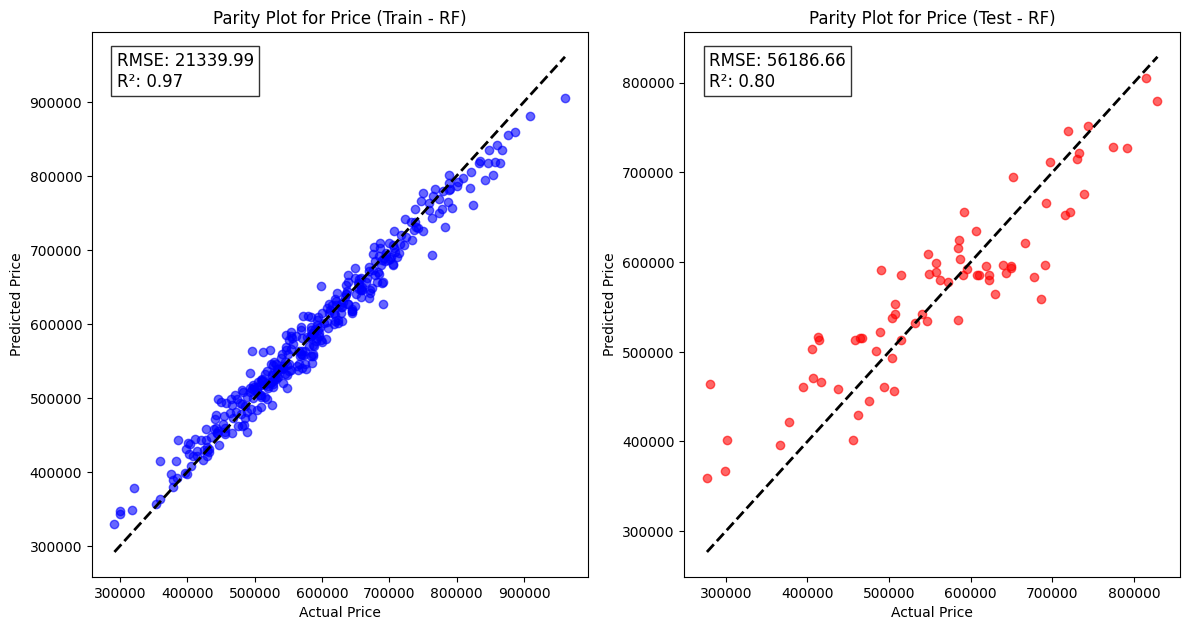

In [ ]:
parity_plot(Y_train, Y_pred_train_rf, Y_test, Y_pred_test_rf, model_name="RF")


###*Validation*

In [ ]:
Y_pred_val_rf = best_rf_Model.predict(X_val)

In [ ]:

# RMSE and R² for Price
rf_rmse_val_Price = np.sqrt(mean_squared_error(Y_val['Price'], Y_pred_val_rf)) # Access 'Price' column directly
rf_r2_val_Price = r2_score(Y_val['Price'], Y_pred_val_rf)  # Access 'Price' column directly


# Print Validation Performance
print("\n=== Model Performance on VALIDATION Data ===")
print(f"Validation RMSE for Price: {rf_rmse_val_Price:.2f}") # Print RMSE for 'Price'
print(f"R² for Price: {rf_r2_val_Price:.2f}") # Print R² for 'Price'



=== Model Performance on VALIDATION Data ===
Validation RMSE for Price: 54179.12
R² for Price: 0.77


###*Parity Plot Validation*

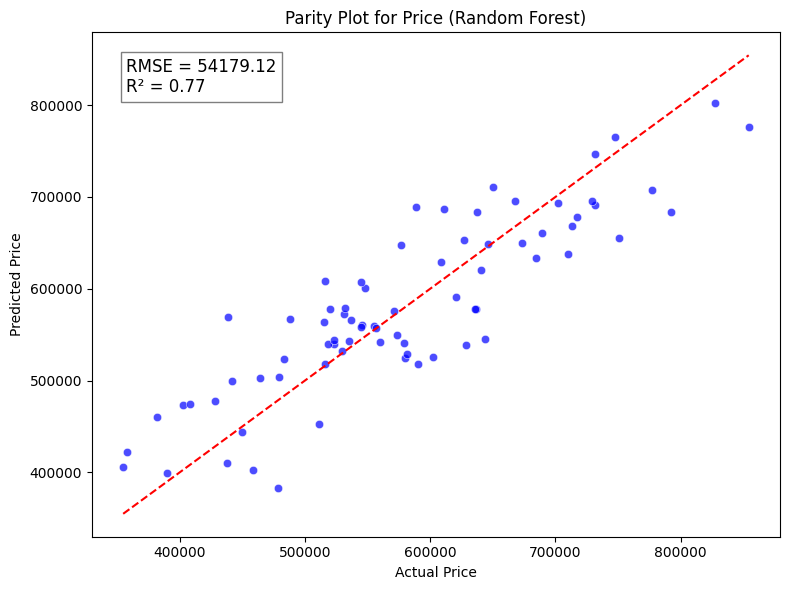

In [ ]:
plot_parity(Y_val, Y_pred_val_rf, model_name="Random Forest")

## *6.2 Decision Tree*

###*Model*

In [ ]:
# Define hyperparameter grid
param_grid_dt = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_dt.fit(X_train, Y_train)

# Get best parameters
best_params_dt = grid_search_dt.best_params_
print(f"Best Parameters: {best_params_dt}")



Best Parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [ ]:
best_params_dt= {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
print(best_params_dt)

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [ ]:
best_dt_model = grid_search_dt.best_estimator_


# Train the best model
best_dt_model = DecisionTreeRegressor(**best_params_dt, random_state=42)
best_dt_model.fit(X_train, Y_train)

# Make predictions
Y_pred_train_dt = best_dt_model.predict(X_train)
Y_pred_test_dt = best_dt_model.predict(X_test)

# Evaluate model performance for Price on TRAIN DATA
dt_rmse_train_Price = np.sqrt(mean_squared_error(Y_train['Price'], Y_pred_train_dt)) # Access 'Price' column using its name
dt_r2_train_Price = r2_score(Y_train['Price'], Y_pred_train_dt) # Access 'Price' column using its name


# Evaluate model performance for Price on TEST DATA
dt_rmse_test_Price = np.sqrt(mean_squared_error(Y_test['Price'], Y_pred_test_dt)) # Access 'Price' column using its name
dt_r2_test_Price = r2_score(Y_test['Price'], Y_pred_test_dt) # Access 'Price' column using its name


# Print evaluation results - Price
print("\n=== Model Performance on TEST Data ===")
print(f"Test RMSE for Price: {dt_rmse_test_Price:.2f}")
print(f"R² for Price: {dt_r2_test_Price:.2f}")

print("\n=== Model Performance on TRAIN Data ===")
print(f"Train RMSE for Price: {dt_rmse_train_Price:.2f}")
print(f"R² for Price: {dt_r2_train_Price:.2f}")



=== Model Performance on TEST Data ===
Test RMSE for Price: 70313.25
R² for Price: 0.69

=== Model Performance on TRAIN Data ===
Train RMSE for Price: 44926.78
R² for Price: 0.87


In [ ]:
# Saving the prediction value

# Convert predictions into DataFrames
df_train_preds_dt = pd.DataFrame(Y_pred_train_dt, columns=['ΔT_pred_train'])
df_test_preds_dt = pd.DataFrame(Y_pred_test_dt, columns=['ΔT_pred_test'])

# Save to Excel
with pd.ExcelWriter("DT_predictions.xlsx") as writer:
    df_train_preds_dt.to_excel(writer, sheet_name="Train Predictions", index=False)
    df_test_preds_dt.to_excel(writer, sheet_name="Test Predictions", index=False)

print("Predictions saved successfully in 'DT_predictions.xlsx'")

Predictions saved successfully in 'DT_predictions.xlsx'


###*Parity Plot for Test & Train*

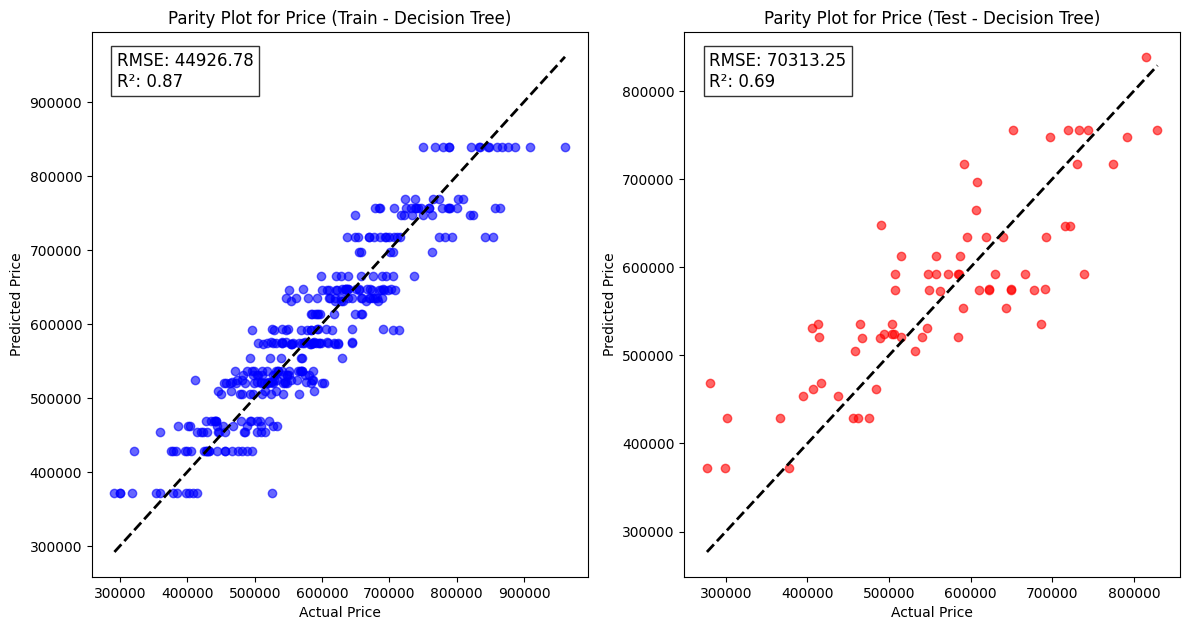

In [ ]:
# Call the function
parity_plot(Y_train, Y_pred_train_dt, Y_test, Y_pred_test_dt, model_name="Decision Tree")

###*Validation*

In [ ]:
Y_pred_val_dt = best_dt_model.predict(X_val)

In [ ]:
# RMSE and R² for Price
dt_rmse_val_Price = np.sqrt(mean_squared_error(Y_val['Price'], Y_pred_val_dt)) # Access 'Price' column directly
dt_r2_val_Price = r2_score(Y_val['Price'], Y_pred_val_dt)  # Access 'Price' column directly

# Print Validation Performance
print("\n=== Model Performance on VALIDATION Data ===")
print(f"Validation RMSE for Price: {dt_rmse_val_Price:.2f}") # Print RMSE for 'Price'
print(f"R² for Price: {dt_r2_val_Price:.2f}") # Print R² for 'Price'




=== Model Performance on VALIDATION Data ===
Validation RMSE for Price: 76815.89
R² for Price: 0.53


###*Parity Plot for Validation*

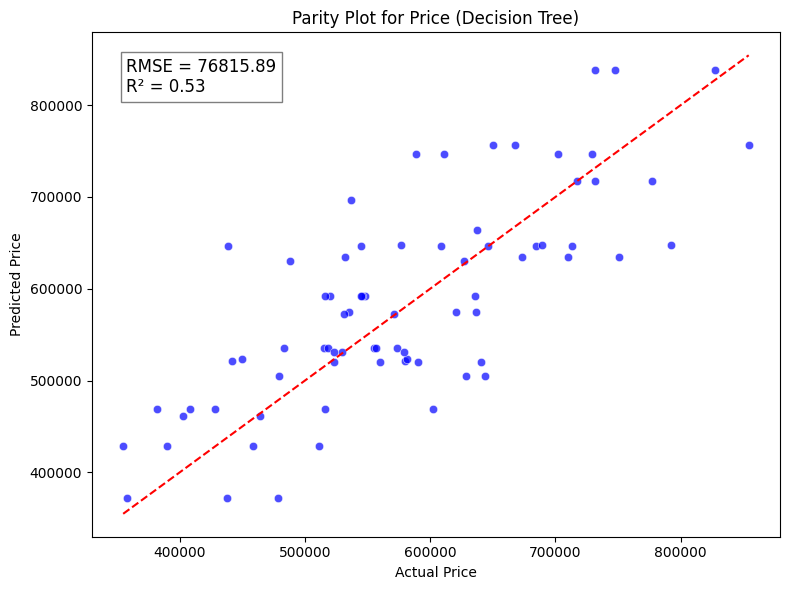

In [ ]:
plot_parity(Y_val, Y_pred_val_dt, model_name="Decision Tree")

## *6.3 KNN*

###*Model*

In [ ]:
# Define parameter grid for GridSearch
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize KNN model
knn_model = KNeighborsRegressor()

# Perform Grid Search with Cross Validation
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_knn.fit(X_train, Y_train)

# Get best parameters
best_params_knn = grid_search_knn.best_params_
print("Best Parameters:", best_params_knn)



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


In [ ]:
best_params_knn={'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
print(best_params_knn)

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


In [ ]:
best_knn_model = grid_search_knn.best_estimator_

# Train the optimized model with the best parameters
best_knn_model = KNeighborsRegressor(**best_params_knn)
best_knn_model.fit(X_train, Y_train)

# Make predictions
Y_pred_train_knn = best_knn_model.predict(X_train)
Y_pred_test_knn = best_knn_model.predict(X_test)


# Train RMSE & R²
knn_rmse_train_Price = np.sqrt(mean_squared_error(Y_train['Price'], Y_pred_train_knn)) # Access 'Price' column directly, Y_pred_train_knn is 1-D
knn_r2_train_Price = r2_score(Y_train['Price'], Y_pred_train_knn)  # Access 'Price' column directly, Y_pred_train_knn is 1-D

# Test RMSE & R²
knn_rmse_test_Price = np.sqrt(mean_squared_error(Y_test['Price'], Y_pred_test_knn)) # Access 'Price' column directly, Y_pred_test_knn is 1-D
knn_r2_test_Price = r2_score(Y_test['Price'], Y_pred_test_knn)  # Access 'Price' column directly, Y_pred_test_knn is 1-D


# === Print evaluation results ===
print("\n=== Model Performance on TEST Data ===")
print(f"Test RMSE for Price: {knn_rmse_test_Price:.2f}")
print(f"R² for Price: {knn_r2_test_Price:.2f}")


print("\n=== Model Performance on TRAIN Data ===")
print(f"Train RMSE for Price: {knn_rmse_train_Price:.2f}")
print(f"R² for Price: {knn_r2_train_Price:.2f}")


=== Model Performance on TEST Data ===
Test RMSE for Price: 88946.91
R² for Price: 0.51

=== Model Performance on TRAIN Data ===
Train RMSE for Price: 77427.40
R² for Price: 0.60


In [ ]:
# Saving the prediction value

# Convert predictions into DataFrames
knn_train_preds_dt = pd.DataFrame(Y_pred_train_knn, columns=['ΔT_pred_train'])
knn_test_preds_dt = pd.DataFrame(Y_pred_test_knn, columns=['ΔT_pred_test'])

# Save to Excel
with pd.ExcelWriter("DT_predictions.xlsx") as writer:
    knn_train_preds_dt.to_excel(writer, sheet_name="Train Predictions", index=False)
    knn_test_preds_dt.to_excel(writer, sheet_name="Test Predictions", index=False)

print("Predictions saved successfully in 'KNN_predictions.xlsx'")

Predictions saved successfully in 'KNN_predictions.xlsx'


###*Parity Plot for Test and Train*

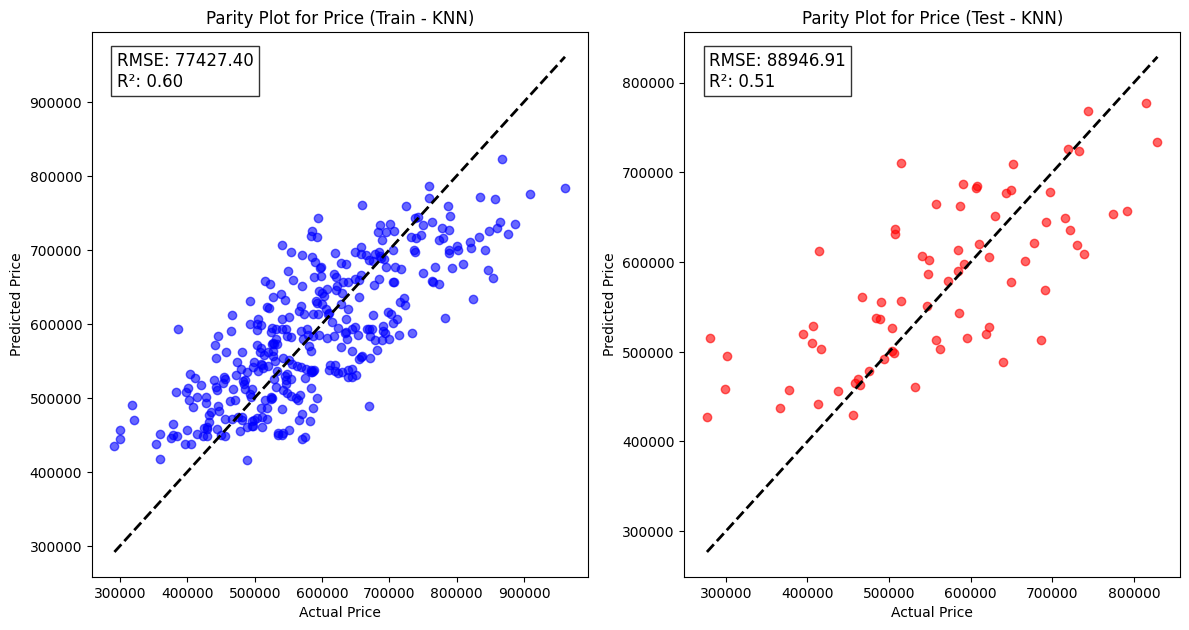

In [ ]:
# Call the function
parity_plot(Y_train, Y_pred_train_knn, Y_test, Y_pred_test_knn, model_name="KNN")

###*Validation*

In [ ]:
Y_pred_val_knn = best_knn_model.predict(X_val)

In [ ]:
# RMSE and R² for Price
knn_rmse_val_Price = np.sqrt(mean_squared_error(Y_val['Price'], Y_pred_val_knn)) # Access 'Price' column directly, Y_pred_val_knn is 1-D
knn_r2_val_Price = r2_score(Y_val['Price'], Y_pred_val_knn)  # Access 'Price' column directly, Y_pred_val_knn is 1-D

# Print Validation Performance
print("\n=== Model Performance on VALIDATION Data ===")
print(f"Validation RMSE for Price: {knn_rmse_val_Price:.2f}") # Print RMSE for 'Price'
print(f"R² for Price: {knn_r2_val_Price:.2f}") # Print R² for 'Price'



=== Model Performance on VALIDATION Data ===
Validation RMSE for Price: 78670.40
R² for Price: 0.50


###*Parity Plot for Validaion*

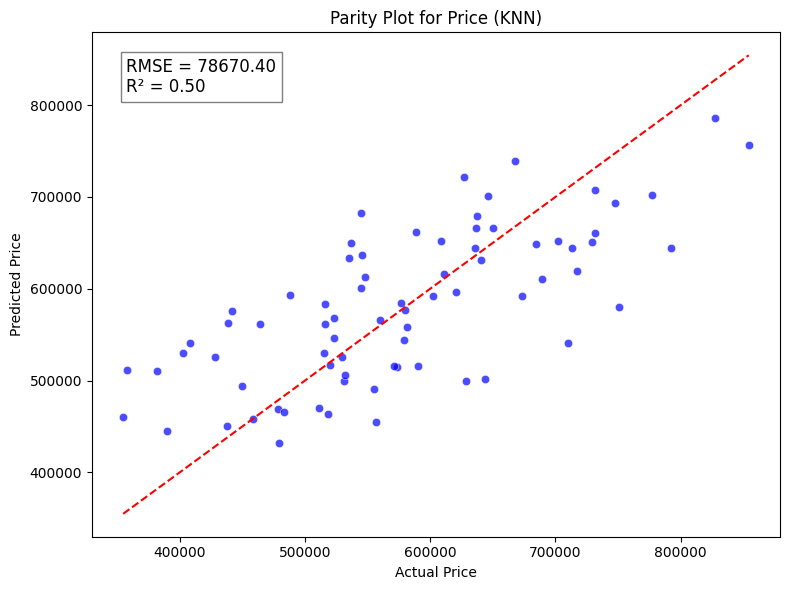

In [ ]:
plot_parity(Y_val, Y_pred_val_knn, model_name="KNN")

##*6.4. Linear Regression*

###*Model*

In [ ]:
# === Initialize Linear Regression Model ===
linear_model = LinearRegression()

# === Define hyperparameter grid ===
# === Define hyperparameter grid ===
param_grid_linear = {
    "estimator__fit_intercept": [True, False],
    # "estimator__normalize": [True, False]  # Remove or comment out this line
    # The 'normalize' parameter was removed from LinearRegression in scikit-learn 1.2
    # If you need normalization, use a pipeline with StandardScaler or MinMaxScaler before LinearRegression.
}


# === Use GridSearchCV for hyperparameter tuning ===
grid_search_linear = GridSearchCV(MultiOutputRegressor(linear_model), param_grid_linear, cv=5, scoring="r2", n_jobs=-1)
grid_search_linear.fit(X_train, Y_train)



GridSearchCV(cv=5, estimator=MultiOutputRegressor(estimator=LinearRegression()),
             n_jobs=-1, param_grid={'estimator__fit_intercept': [True, False]},
             scoring='r2')

In [ ]:
# === Get the best model from GridSearchCV ===
best_model_linear = grid_search_linear.best_estimator_

# === Make predictions on Train and Test data using the best model ===
Y_pred_train_linear = best_model_linear.predict(X_train)
Y_pred_test_linear = best_model_linear.predict(X_test)


In [ ]:
# === Compute RMSE & R² for Train & Test Sets ===
metrics_linear = {}

for dataset, Y_actual, Y_pred, label in zip(
    ["Train", "Test"], [Y_train, Y_test], [Y_pred_train_linear, Y_pred_test_linear], ["train", "test"]
):
    # Access the 'Price' column directly for Y_actual (DataFrame)
    # and the first column (index 0) for Y_pred (NumPy array)
    metrics_linear[f"RMSE Price {dataset}"] = np.sqrt(mean_squared_error(Y_actual['Price'], Y_pred[:, 0]))
    metrics_linear[f"R² Price {dataset}"] = r2_score(Y_actual['Price'], Y_pred[:, 0])

# === Print Performance Metrics ===
print("\n == Optimized Linear Regression Model Performance ==")
for key, value in metrics_linear.items():
    print(f" {key}: {value:.4f}")


 == Optimized Linear Regression Model Performance ==
 RMSE Price Train: 18256.4596
 R² Price Train: 0.9779
 RMSE Price Test: 21985.7340
 R² Price Test: 0.9701


In [ ]:
# Saving the prediction value

# Convert predictions into DataFrames
# The predictions are for a single target, so use only one column for 'Price'
train_preds_linear = pd.DataFrame(Y_pred_train_linear, columns=['Price_pred_train'])

# Adjust column names for test predictions to reflect 'Price'
test_preds_linear = pd.DataFrame(Y_pred_test_linear, columns=['Price_pred_test'])

# Save to Excel
with pd.ExcelWriter("linear_predictions.xlsx") as writer:
    train_preds_linear.to_excel(writer, sheet_name="Train Predictions", index=False)
    test_preds_linear.to_excel(writer, sheet_name="Test Predictions", index=False)

print("Predictions saved successfully in 'linear_predictions.xlsx'")

Predictions saved successfully in 'linear_predictions.xlsx'


###*Parity Plot for Test and Train*

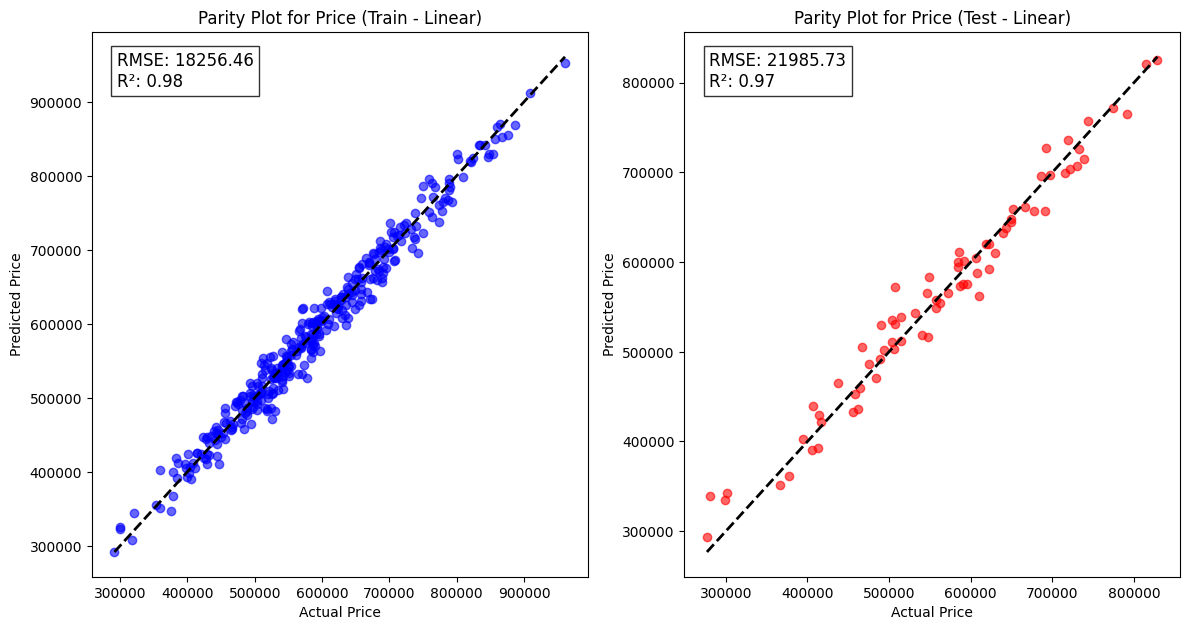

In [ ]:
# Call the function
parity_plot(Y_train, Y_pred_train_linear, Y_test, Y_pred_test_linear, model_name="Linear")

###*Validation*

In [ ]:
Y_pred_val_linear = best_model_linear.predict(X_val)

In [ ]:
# RMSE and R² for Price (Previously ΔT)
linear_rmse_val_Price = np.sqrt(mean_squared_error(Y_val['Price'], Y_pred_val_linear))  # Access 'Price' column directly
linear_r2_val_Price = r2_score(Y_val['Price'], Y_pred_val_linear)  # Access 'Price' column directly


# Print Validation Performance
print("\n=== Model Performance on VALIDATION Data ===")
print(f"Validation RMSE for Price: {linear_rmse_val_Price:.2f}")  # Print RMSE for 'Price'
print(f"R² for Price: {linear_r2_val_Price:.2f}")  # Print R² for 'Price'




=== Model Performance on VALIDATION Data ===
Validation RMSE for Price: 19532.15
R² for Price: 0.97


###*Parity Plot for Validation*

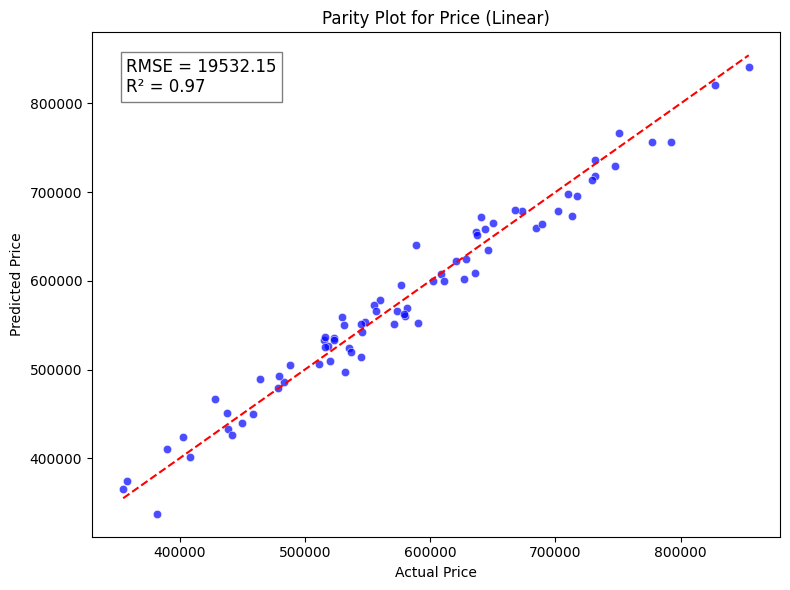

In [ ]:
plot_parity(Y_val, Y_pred_val_linear, model_name="Linear")

##*6.5 Lasso Regression*

###*Model*

In [ ]:
# === Define the base model ===
lasso_Model = Lasso()

# === Define the hyperparameter grid ===
param_grid_lasso = {
    'estimator__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# === Wrap the model with MultiOutputRegressor ===
multioutput_lasso_Model = MultiOutputRegressor(lasso_Model)

# === Use GridSearchCV to find the best parameters ===
grid_search_lasso = GridSearchCV(
    estimator=multioutput_lasso_Model,
    param_grid=param_grid_lasso,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# === Perform grid search on training data ===
grid_search_lasso.fit(X_train, Y_train)

# === Get the best hyperparameters ===
best_params_lasso = grid_search_lasso.best_params_
print("Best Hyperparameters:", best_params_lasso)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters: {'estimator__alpha': 0.01}


In [ ]:
best_params_lasso = {'estimator__alpha': 0.01}
print(best_params_lasso)

{'estimator__alpha': 0.01}


In [ ]:
# === Predict on training and test data using the best estimator ===
Y_pred_train_lasso = grid_search_lasso.best_estimator_.predict(X_train)
Y_pred_test_lasso = grid_search_lasso.best_estimator_.predict(X_test)


In [ ]:
# === Evaluate model performance for both targets (ΔT and AP) on TEST DATA ===
lasso_rmse_test = np.sqrt(mean_squared_error(Y_test['Price'], Y_pred_test_lasso)) # Access 'Price' column directly
lasso_r2_test = r2_score(Y_test['Price'], Y_pred_test_lasso) # Access 'Price' column directly


# === Evaluate model performance for both targets (ΔT and AP) on TRAIN DATA ===
lasso_rmse_train = np.sqrt(mean_squared_error(Y_train['Price'], Y_pred_train_lasso)) # Access 'Price' column directly
lasso_r2_train = r2_score(Y_train['Price'], Y_pred_train_lasso) # Access 'Price' column directly


###*Parity Plot for Test and Train*

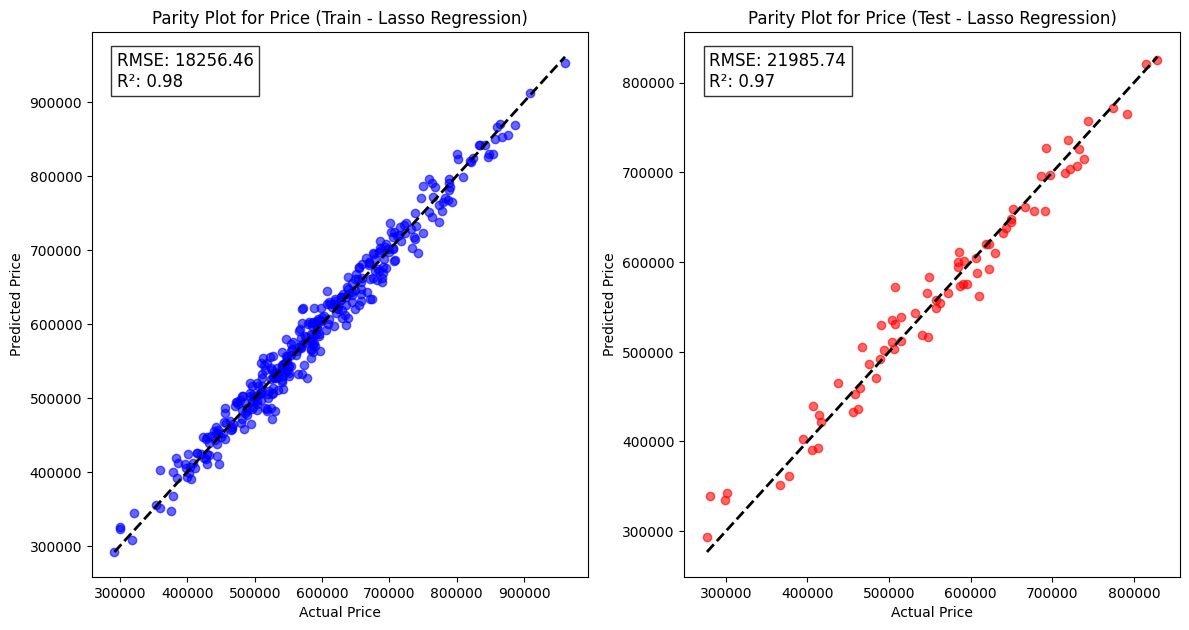

In [ ]:
parity_plot(Y_train, Y_pred_train_lasso, Y_test,  Y_pred_test_lasso, model_name="Lasso Regression")

###*Validation*

In [ ]:
# === Get the best estimator from the grid search ===
best_lasso_Model = grid_search_lasso.best_estimator_

# === Predict on validation data ===
Y_pred_val_lasso = best_lasso_Model.predict(X_val)


In [ ]:
# RMSE and R² for Price
lasso_rmse_val_Price = np.sqrt(mean_squared_error(Y_val['Price'], Y_pred_val_lasso))  # Access 'Price' column directly
lasso_r2_val_Price = r2_score(Y_val['Price'], Y_pred_val_lasso)  # Access 'Price' column directly

# Print Validation Performance
print("\n=== Model Performance on VALIDATION Data ===")
print(f"Validation RMSE for Price: {lasso_rmse_val_Price:.2f}") # Print RMSE for 'Price'
print(f"R² for Price: {lasso_r2_val_Price:.2f}") # Print R² for 'Price'



=== Model Performance on VALIDATION Data ===
Validation RMSE for Price: 19532.15
R² for Price: 0.97


###*Parity Plot for Validation*

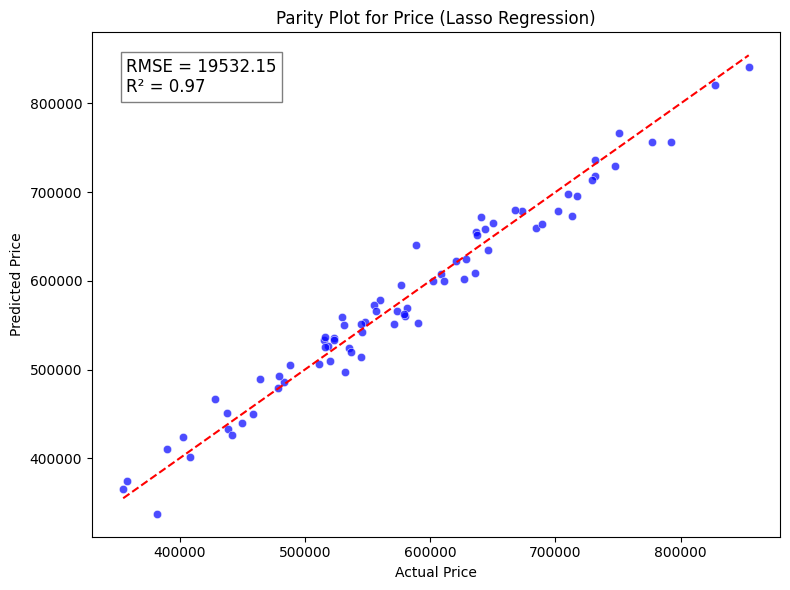

In [ ]:
plot_parity(Y_val, Y_pred_val_lasso, model_name="Lasso Regression")

##*6.6 Ridge Regression*

###*Model*

In [ ]:
# === Define the base Ridge model ===
ridge_model = Ridge()

# === Define the hyperparameter grid ===
param_grid_ridge = {
    'estimator__alpha': [0.1, 1.0, 10.0, 100.0]
}

# === Wrap the model with MultiOutputRegressor ===
multioutput_ridge = MultiOutputRegressor(ridge_model)

# === Use GridSearchCV to find the best parameters ===
grid_search_ridge = GridSearchCV(
    estimator=multioutput_ridge,
    param_grid=param_grid_ridge,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# === Perform grid search on training data ===
grid_search_ridge.fit(X_train, Y_train)

# === Get the best hyperparameters ===
best_params_ridge = grid_search_ridge.best_params_
print("Best Hyperparameters:", best_params_ridge)



Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyperparameters: {'estimator__alpha': 0.1}


In [ ]:
best_params_ridge= {'estimator__alpha': 0.1}
print(best_params_ridge)

{'estimator__alpha': 0.1}


In [ ]:
# === Get the best estimator from the grid search ===
best_ridge_model = grid_search_ridge.best_estimator_

# === Predict on training and test data ===
Y_pred_train_ridge = best_ridge_model.predict(X_train)
Y_pred_test_ridge = best_ridge_model.predict(X_test)


In [ ]:
# === Evaluate model performance for 'Price' on TEST DATA ===
ridge_rmse_test_Price = np.sqrt(mean_squared_error(Y_test['Price'], Y_pred_test_ridge[:, 0])) # Access 'Price' column using its name
ridge_r2_test_Price = r2_score(Y_test['Price'], Y_pred_test_ridge[:, 0]) # Access 'Price' column using its name


# === Evaluate model performance for 'Price' on TRAIN DATA ===
ridge_rmse_train_Price = np.sqrt(mean_squared_error(Y_train['Price'], Y_pred_train_ridge[:, 0])) # Access 'Price' column using its name
ridge_r2_train_Price = r2_score(Y_train['Price'], Y_pred_train_ridge[:, 0]) # Access 'Price' column using its name

# === Print evaluation results ===
print("\n=== Model Performance on TEST Data ===")
print(f"Test RMSE for Price: {ridge_rmse_test_Price:.2f}") # Print RMSE for Price
print(f"R² for Price: {ridge_r2_test_Price:.2f}") # Print R² for Price

print("\n=== Model Performance on TRAIN Data ===")
print(f"Train RMSE for Price: {ridge_rmse_train_Price:.2f}") # Print RMSE for Price
print(f"R² for Price: {ridge_r2_train_Price:.2f}") # Print R² for Price



=== Model Performance on TEST Data ===
Test RMSE for Price: 21996.11
R² for Price: 0.97

=== Model Performance on TRAIN Data ===
Train RMSE for Price: 18256.50
R² for Price: 0.98


In [ ]:
# Saving the prediction value

# Convert predictions into DataFrames
# The predictions array contains only a single column.
# Ensure the column name matches the actual target variable predicted ('Price')

ridge_train_preds = pd.DataFrame(Y_pred_train_ridge, columns=['Price_pred_train'])  # Using 'Price_pred_train'
ridge_test_preds = pd.DataFrame(Y_pred_test_ridge, columns=['Price_pred_test'])  # Using 'Price_pred_test'


# Save to Excel
with pd.ExcelWriter("ridge_predictions.xlsx") as writer:
    ridge_train_preds.to_excel(writer, sheet_name="Train Predictions", index=False)
    ridge_test_preds.to_excel(writer, sheet_name="Test Predictions", index=False)

print("Predictions saved successfully in 'ridge_predictions.xlsx'")


Predictions saved successfully in 'ridge_predictions.xlsx'


###*Parity Plot for Test and Train*

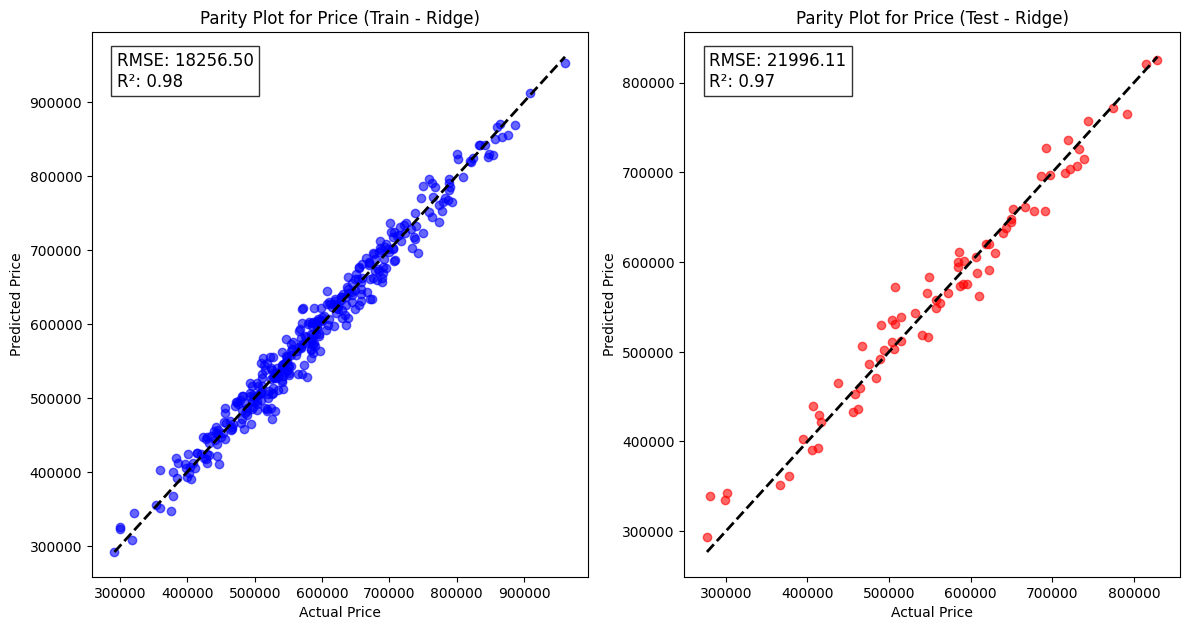

In [ ]:
# Call the function
parity_plot(Y_train, Y_pred_train_ridge, Y_test, Y_pred_test_ridge, model_name="Ridge")

###*Validation*

In [ ]:
Y_pred_val_ridge = best_ridge_model.predict(X_val)

In [ ]:
# RMSE and R² for Price
ridge_rmse_val_Price = np.sqrt(mean_squared_error(Y_val['Price'], Y_pred_val_ridge))  # Access 'Price' column directly
ridge_r2_val_Price = r2_score(Y_val['Price'], Y_pred_val_ridge)  # Access 'Price' column directly

# Print Validation Performance
print("\n=== Model Performance on VALIDATION Data ===")
print(f"Validation RMSE for Price: {ridge_rmse_val_Price:.2f}")  # Print RMSE for 'Price'
print(f"R² for Price: {ridge_r2_val_Price:.2f}")  # Print R² for 'Price'



=== Model Performance on VALIDATION Data ===
Validation RMSE for Price: 19532.55
R² for Price: 0.97


###*Parity Plot for Validation*

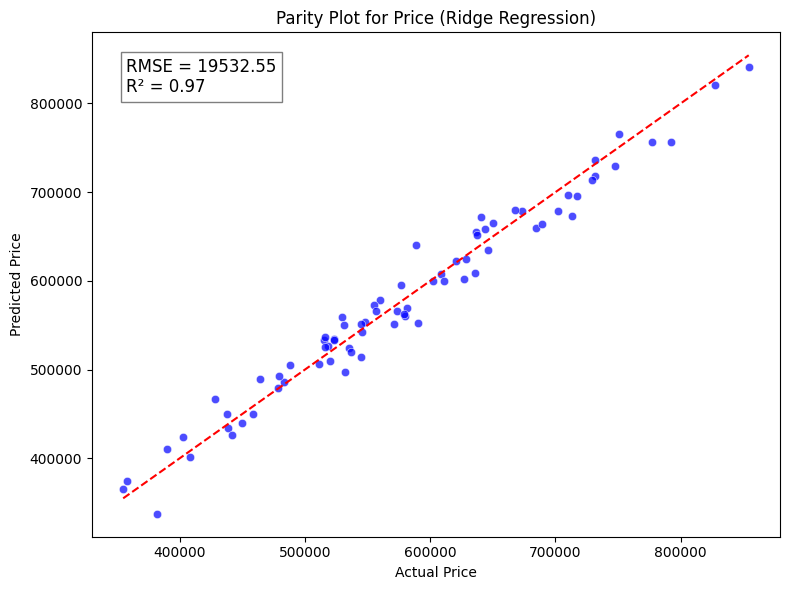

In [ ]:
plot_parity(Y_val, Y_pred_val_ridge, model_name="Ridge Regression")

##*6.7 Elastic Regression*

###*Model*

In [ ]:
# === Standardize the features ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Define the base model ===
elasticnet_model = ElasticNet()

# === Define the hyperparameter grid ===
param_grid_elas = {
    'estimator__alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
    'estimator__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}

# === Wrap the model with MultiOutputRegressor ===
multioutput_elas_model = MultiOutputRegressor(elasticnet_model)

# === Use GridSearchCV to find the best parameters ===
grid_search_elas = GridSearchCV(
    estimator=multioutput_elas_model,
    param_grid=param_grid_elas,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# === Perform grid search on training data ===
grid_search_elas.fit(X_train_scaled, Y_train)

# === Get the best hyperparameters ===
best_params_elas = grid_search_elas.best_params_
print("Best Hyperparameters:", best_params_elas)



Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Hyperparameters: {'estimator__alpha': 0.1, 'estimator__l1_ratio': 1.0}


In [ ]:
best_params_elas= {'estimator__alpha': 0.1, 'estimator__l1_ratio': 1.0}
print(best_params_elas)

{'estimator__alpha': 0.1, 'estimator__l1_ratio': 1.0}


In [ ]:
# === Train the final model with the best parameters ===
best_elas_model = grid_search_elas.best_estimator_

# === Make predictions on the Test Set ===
Y_pred_test_elas = best_elas_model.predict(X_test_scaled)

# === Make predictions on the Train Set ===
Y_pred_train_elas = best_elas_model.predict(X_train_scaled)

# === Evaluate model performance for 'Price' on TEST DATA ===
elas_rmse_test_Price = np.sqrt(mean_squared_error(Y_test['Price'], Y_pred_test_elas[:, 0])) # Access 'Price' column using its name
elas_r2_test_Price = r2_score(Y_test['Price'], Y_pred_test_elas[:, 0]) # Access 'Price' column using its name


# === Evaluate model performance for 'Price' on TRAIN DATA ===
elas_rmse_train_Price = np.sqrt(mean_squared_error(Y_train['Price'], Y_pred_train_elas[:, 0])) # Access 'Price' column using its name
elas_r2_train_Price = r2_score(Y_train['Price'], Y_pred_train_elas[:, 0]) # Access 'Price' column using its name

# === Print evaluation results ===
print("\n=== Model Performance on TEST Data ===")
print(f"Test RMSE for Price: {elas_rmse_test_Price:.2f}") # Print RMSE for Price
print(f"R² for Price: {elas_r2_test_Price:.2f}") # Print R² for Price

print("\n=== Model Performance on TRAIN Data ===")
print(f"Train RMSE for Price: {elas_rmse_train_Price:.2f}") # Print RMSE for Price
print(f"R² for Price: {elas_r2_train_Price:.2f}") # Print R² for Price




=== Model Performance on TEST Data ===
Test RMSE for Price: 21985.82
R² for Price: 0.97

=== Model Performance on TRAIN Data ===
Train RMSE for Price: 18256.46
R² for Price: 0.98


In [ ]:
# Saving the prediction value

# Convert predictions into DataFrames
elas_train_preds_elas = pd.DataFrame(Y_pred_train_elas, columns=['Y_pred_train_elas'])
elas_test_preds_elas = pd.DataFrame(Y_pred_test_elas, columns=['Y_pred_test_elas'])

# Save to Excel
with pd.ExcelWriter("ElasticNet_predictions.xlsx") as writer:
    elas_train_preds_elas.to_excel(writer, sheet_name="Train Predictions", index=False)
    elas_test_preds_elas.to_excel(writer, sheet_name="Test Predictions", index=False)

print("Predictions saved successfully in 'elasticnet_predictions.xlsx'")

Predictions saved successfully in 'elasticnet_predictions.xlsx'


###*Parity Plot for Test ND Train*

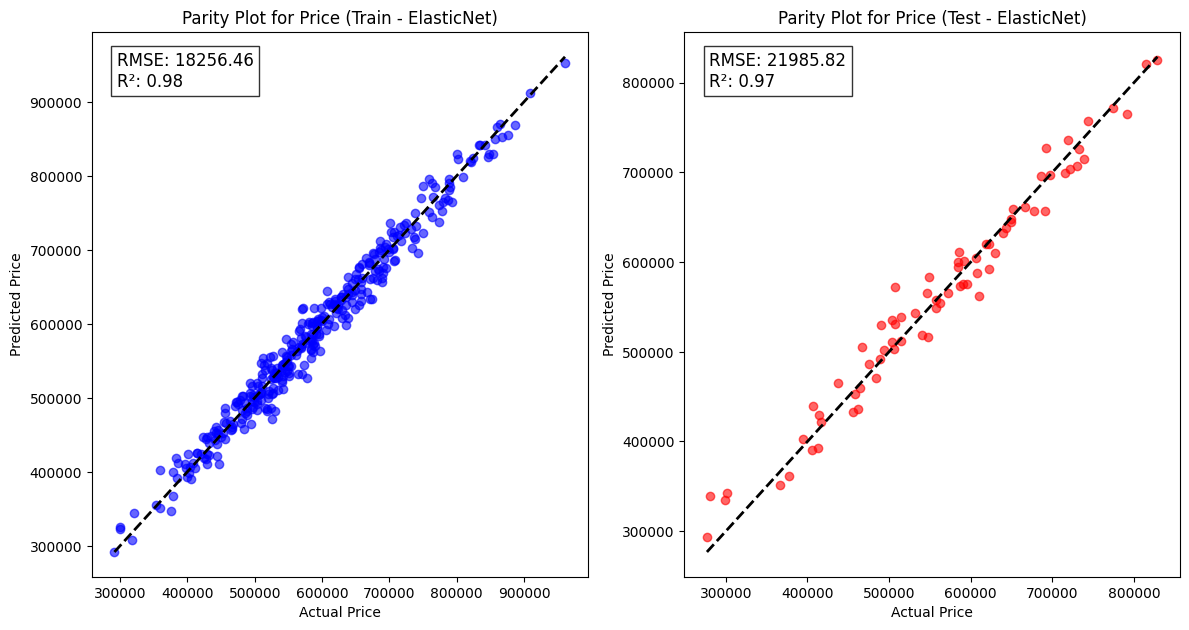

In [ ]:
# Call the function
parity_plot(Y_train, Y_pred_train_elas, Y_test, Y_pred_test_elas, model_name="ElasticNet")

###*Validation*

In [ ]:
Y_pred_val_elas = best_elas_model.predict(X_val)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


In [ ]:
# RMSE and R² for Price
elas_rmse_val_Price = np.sqrt(mean_squared_error(Y_val['Price'], Y_pred_val_elas))  # Access 'Price' column directly
elas_r2_val_Price = r2_score(Y_val['Price'], Y_pred_val_elas)  # Access 'Price' column directly

# Print Validation Performance
print("\n=== Model Performance on VALIDATION Data ===")
print(f"Validation RMSE for Price: {elas_rmse_val_Price:.2f}") # Print RMSE for 'Price'
print(f"R² for Price: {elas_r2_val_Price:.2f}") # Print R² for 'Price'


=== Model Performance on VALIDATION Data ===
Validation RMSE for Price: 120321308.26
R² for Price: -1158148.13


###*Parity Plot Validation*

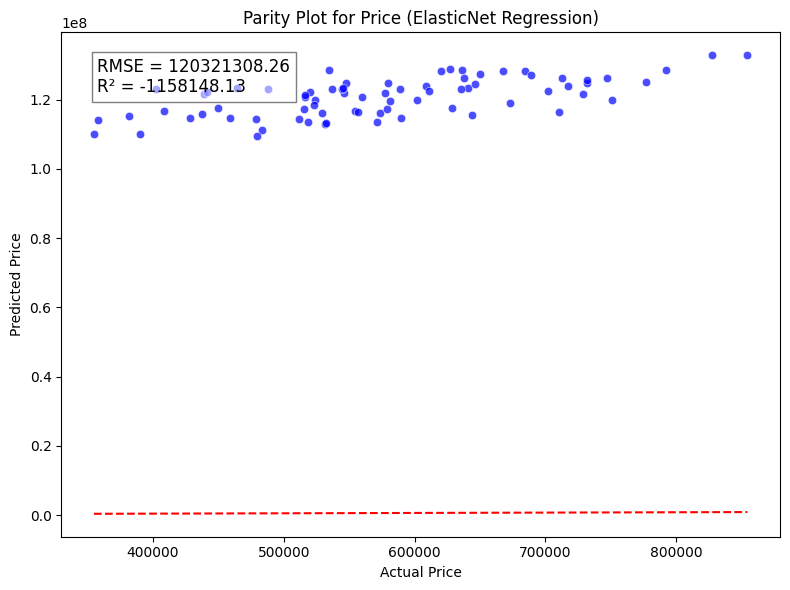

In [ ]:
plot_parity(Y_val, Y_pred_val_elas, model_name="ElasticNet Regression")

##*6.8 SGD Regression*

###*Model*

In [ ]:
# === Standardize the features ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Define the base model ===
sgd_model = SGDRegressor(random_state=42)

# === Define the hyperparameter grid ===
param_grid_sgd = {
    'estimator__alpha': [0.0001, 0.001, 0.01, 0.1],
    'estimator__penalty': ['l2', 'l1', 'elasticnet'],
    'estimator__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'estimator__max_iter': [100, 500, 1000],
    'estimator__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}

# === Wrap the model with MultiOutputRegressor ===
multioutput_sgd_model = MultiOutputRegressor(sgd_model)

# === Use GridSearchCV to find the best parameters ===
grid_search_sgd = GridSearchCV(
    estimator=multioutput_sgd_model,
    param_grid=param_grid_sgd,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# === Perform grid search on training data ===
grid_search_sgd.fit(X_train_scaled, Y_train)

# === Get the best hyperparameters ===
best_params_sgd = grid_search_sgd.best_params_
print("Best Hyperparameters:", best_params_sgd)



Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best Hyperparameters: {'estimator__alpha': 0.001, 'estimator__l1_ratio': 0.5, 'estimator__learning_rate': 'invscaling', 'estimator__max_iter': 100, 'estimator__penalty': 'elasticnet'}


In [ ]:
# === Get the best estimator from the grid search ===
best_sgd_model = grid_search_sgd.best_estimator_

# === Predict on training and test data using the best estimator ===
Y_pred_train_sgd = grid_search_sgd.best_estimator_.predict(X_train_scaled)
Y_pred_test_sgd = grid_search_sgd.best_estimator_.predict(X_test_scaled)


In [ ]:
# === Evaluate model performance for 'Price' on TEST DATA ===
sgd_rmse_test_Price = np.sqrt(mean_squared_error(Y_test['Price'], Y_pred_test_sgd[:, 0])) # Access 'Price' column using its name
sgd_r2_test_Price = r2_score(Y_test['Price'], Y_pred_test_sgd[:, 0]) # Access 'Price' column using its name


# === Evaluate model performance for 'Price' on TRAIN DATA ===
sgd_rmse_train_Price = np.sqrt(mean_squared_error(Y_train['Price'], Y_pred_train_sgd[:, 0])) # Access 'Price' column using its name
sgd_r2_train_Price = r2_score(Y_train['Price'], Y_pred_train_sgd[:, 0]) # Access 'Price' column using its name

# === Print evaluation results ===
print("\n=== Model Performance on TEST Data ===")
print(f"Test RMSE for Price: {sgd_rmse_test_Price:.2f}") # Print RMSE for Price
print(f"R² for Price: {sgd_r2_test_Price:.2f}") # Print R² for Price

print("\n=== Model Performance on TRAIN Data ===")
print(f"Train RMSE for Price: {sgd_rmse_train_Price:.2f}") # Print RMSE for Price
print(f"R² for Price: {sgd_r2_train_Price:.2f}") # Print R² for Price



=== Model Performance on TEST Data ===
Test RMSE for Price: 21993.84
R² for Price: 0.97

=== Model Performance on TRAIN Data ===
Train RMSE for Price: 18256.87
R² for Price: 0.98


###*Parity Plot for Test and Train*

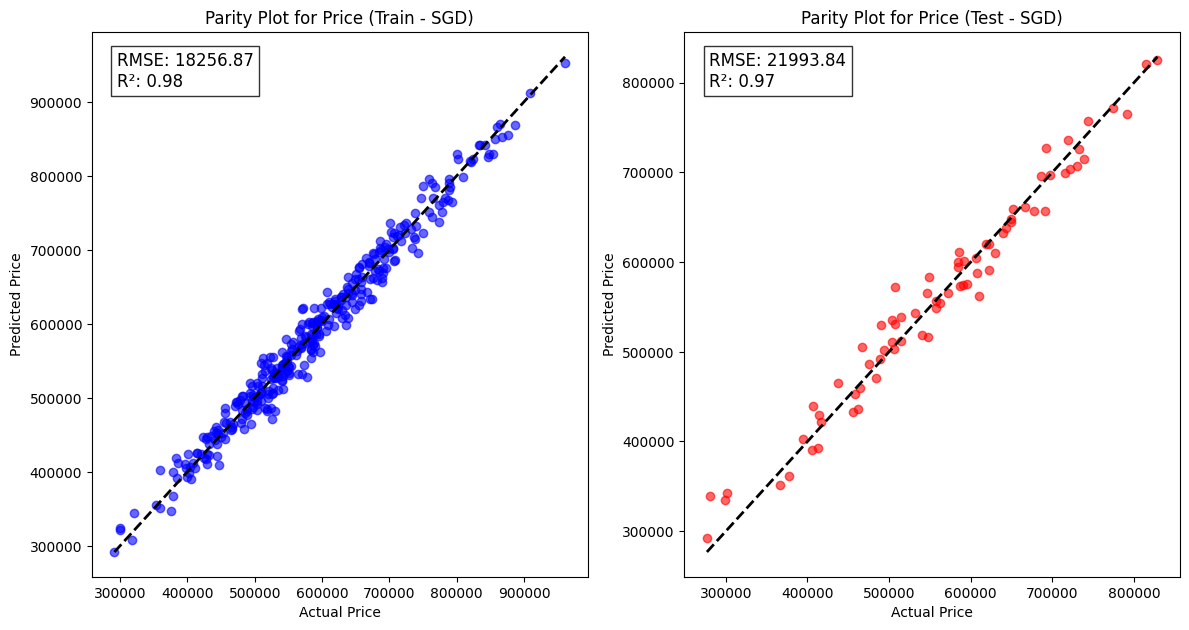

In [ ]:
# Call the function
parity_plot(Y_train, Y_pred_train_sgd, Y_test, Y_pred_test_sgd, model_name="SGD")

###*Validation*

In [ ]:
Y_pred_val_sgd = best_sgd_model.predict(X_val)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


In [ ]:
# RMSE and R² for Price (Previously ΔT)
sgd_rmse_val_Price = np.sqrt(mean_squared_error(Y_val['Price'], Y_pred_val_sgd)) # Access 'Price' column, Y_pred_val_sgd is likely 1-D
sgd_r2_val_Price = r2_score(Y_val['Price'], Y_pred_val_sgd) # Access 'Price' column, Y_pred_val_sgd is likely 1-D


# Print Validation Performance
print("\n=== Model Performance on VALIDATION Data ===")
print(f"Validation RMSE for Price: {sgd_rmse_val_Price:.2f}") # Print RMSE for 'Price'
print(f"R² for Price: {sgd_r2_val_Price:.2f}") # Print R² for 'Price'



=== Model Performance on VALIDATION Data ===
Validation RMSE for Price: 120230496.39
R² for Price: -1156400.58


###*Parity Plot Validation*

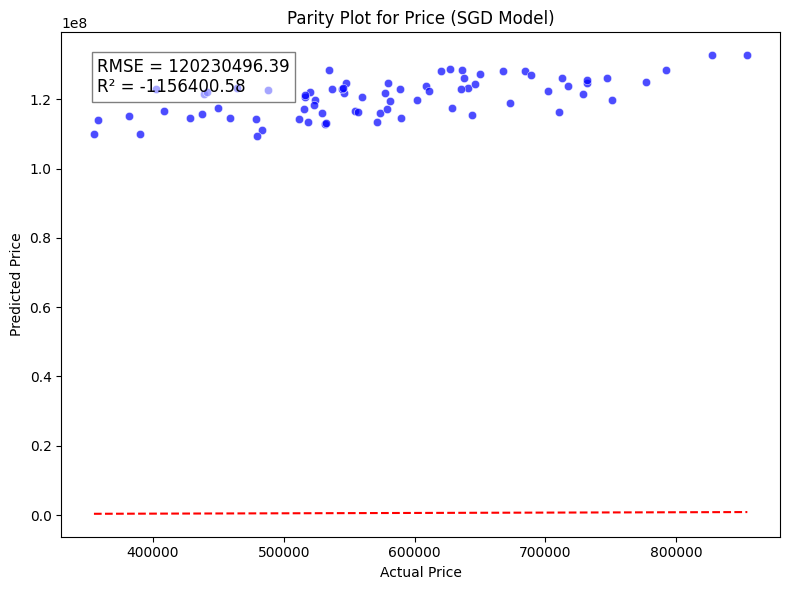

In [ ]:
plot_parity(Y_val, Y_pred_val_sgd, model_name="SGD Model")

# 7.R² Graphs (Comparision plot) Price


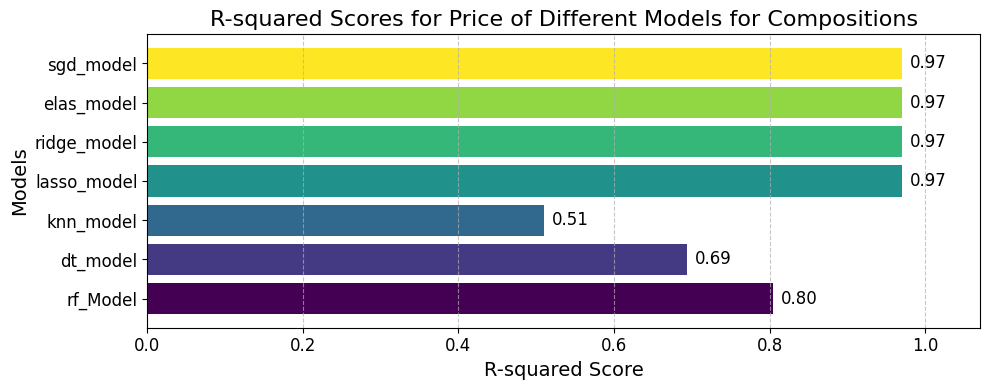

In [ ]:

# Model names
model_names = ['rf_Model', 'dt_model','knn_model','lasso_model', 'ridge_model', 'elas_model', 'sgd_model']

# Extracting the correct float values from the dictionary
r2_values_ΔT = [
    rf_r2_test_Price,
    dt_r2_test_Price,
    knn_r2_test_Price,
    lasso_r2_test,
    ridge_r2_test_Price,
    elas_r2_test_Price,
    sgd_r2_test_Price

]
# Plot setup
fig, ax = plt.subplots(figsize=(10, 4))

# Using a visually appealing color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(r2_values_ΔT)))
bars = ax.barh(model_names, r2_values_ΔT, color=colors)

ax.set_title('R-squared Scores for Price of Different Models for Compositions', fontsize=16)
ax.set_xlabel('R-squared Score', fontsize=14)
ax.set_ylabel('Models', fontsize=14)
ax.tick_params(axis='both', labelsize=12)

# Annotate bars with rounded values and adjust text position
for bar in bars:
    width = bar.get_width()
    label_text = f"{width:.2f}"  # Format to two decimal places
    ax.text(width + 0.01, bar.get_y() + bar.get_height() / 2, label_text,
            va='center', ha='left', fontsize=12)

# Improve readability
ax.grid(True, axis='x', linestyle='--', alpha=0.7)
ax.set_xlim(min(0, min(r2_values_ΔT) - 0.1), max(1, max(r2_values_ΔT) + 0.1))

plt.tight_layout()
plt.show()


#*8.RMSE Graph(Comparision plot) Price*

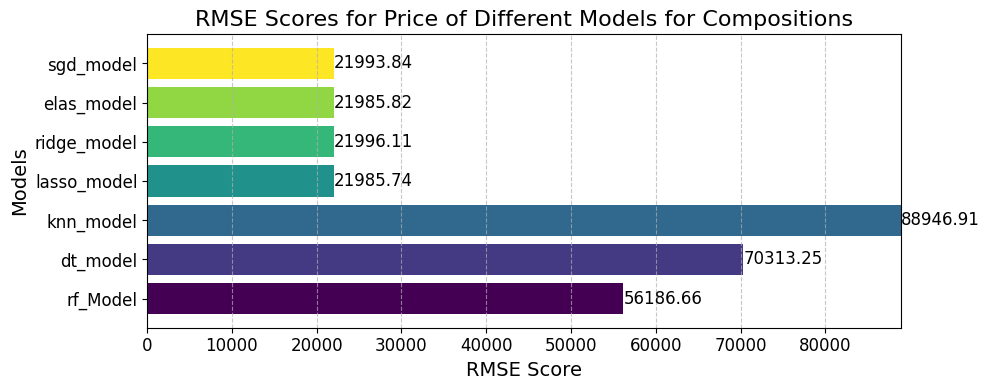

In [ ]:
# List of model names
model_names = ['rf_Model', 'dt_model','knn_model','lasso_model', 'ridge_model', 'elas_model', 'sgd_model']

# RMSE values for each model
rmse_values_ΔT = [
    rf_rmse_test_Price,
    dt_rmse_test_Price,
    knn_rmse_test_Price,
    lasso_rmse_test,
    ridge_rmse_test_Price,
    elas_rmse_test_Price,
    sgd_rmse_test_Price
]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 4))  # Increased figure size for better readability

# Using a more visually appealing color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(rmse_values_ΔT)))
bars = ax.barh(model_names, rmse_values_ΔT, color=colors)

# Title and labels
ax.set_title('RMSE Scores for Price of Different Models for Compositions', fontsize=16)
ax.set_xlabel('RMSE Score', fontsize=14)
ax.set_ylabel('Models', fontsize=14)
ax.tick_params(axis='both', labelsize=12)  # Increase tick label size

# Annotate bars with rounded values and adjust text position
for bar in bars:
    width = bar.get_width()
    label_text = f"{width:.2f}"  # Format to two decimal places
    ax.text(width + 0.01, bar.get_y() + bar.get_height() / 2, label_text,
            va='center', ha='left', fontsize=12)  # Improved text placement and size

# Add grid for better readability
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

# Set x-axis limits for better visualization
ax.set_xlim(min(0, min(rmse_values_ΔT) - 0.1), max(rmse_values_ΔT) + 0.1)

# Tight layout to ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()
